In [1]:
# project uses the caltech101 dataset found here https://data.caltech.edu/records/mzrjq-6wc02

%pip install tensorflow
%pip install keras
%pip install matplotlib
%pip install tensorflow_datasets
%pip install numpy
%pip install seaborn

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load dataset
train_data, val_data, test_data = tfds.load('caltech101', split=['train[:80%]', 'train[80%:]', 'test'], shuffle_files=True, as_supervised=True)

print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

info = tfds.builder('caltech101').info
class_names = info.features['label'].names
print(f"Total classes: {len(class_names)}")



2024-10-30 19:23:35.336212: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2024-10-30 19:23:36.039215: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training set size: 2448


2024-10-30 19:23:36.351546: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation set size: 612
Test set size: 6084
Image shape: (297, 300, 3)
Label: 10
Total classes: 102


2024-10-30 19:23:38.294130: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


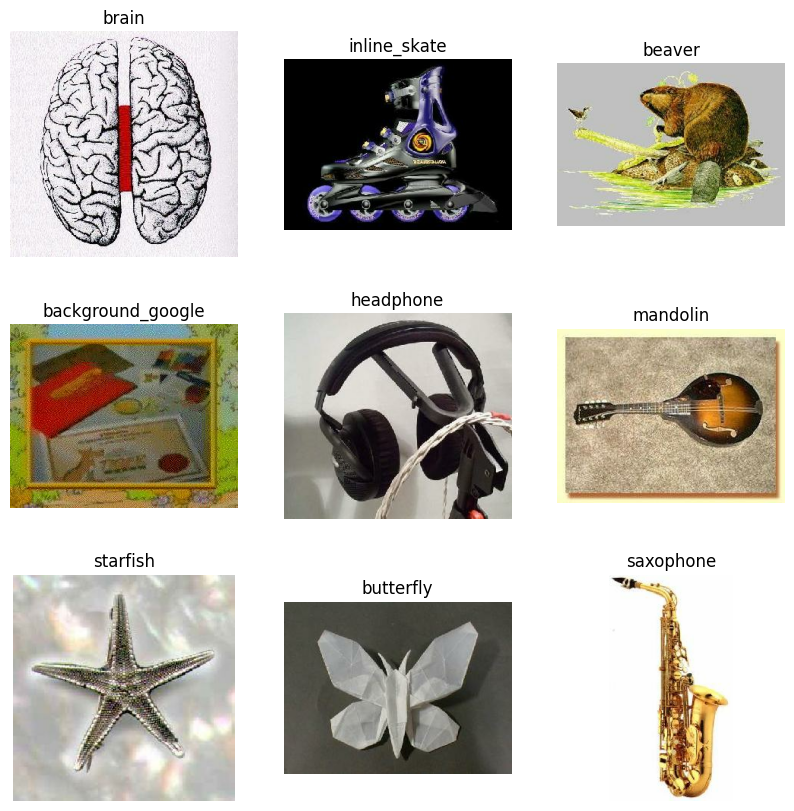

In [3]:
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

In [4]:
# Counting instances per class
import collections
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)


Counter({np.int64(54): 29, np.int64(46): 28, np.int64(16): 28, np.int64(47): 27, np.int64(40): 27, np.int64(52): 27, np.int64(58): 27, np.int64(72): 27, np.int64(98): 27, np.int64(96): 27, np.int64(55): 27, np.int64(29): 27, np.int64(27): 27, np.int64(100): 27, np.int64(21): 27, np.int64(94): 26, np.int64(43): 26, np.int64(15): 26, np.int64(74): 26, np.int64(59): 26, np.int64(30): 26, np.int64(84): 26, np.int64(75): 26, np.int64(20): 26, np.int64(0): 26, np.int64(51): 25, np.int64(7): 25, np.int64(45): 25, np.int64(97): 25, np.int64(36): 25, np.int64(73): 25, np.int64(17): 25, np.int64(44): 25, np.int64(65): 25, np.int64(81): 25, np.int64(31): 25, np.int64(77): 25, np.int64(89): 25, np.int64(83): 25, np.int64(4): 24, np.int64(13): 24, np.int64(70): 24, np.int64(8): 24, np.int64(92): 24, np.int64(23): 24, np.int64(25): 24, np.int64(39): 24, np.int64(50): 24, np.int64(12): 24, np.int64(9): 24, np.int64(28): 24, np.int64(91): 24, np.int64(53): 24, np.int64(3): 24, np.int64(68): 24, np.int

In [5]:
# Print all label names
print("Class Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Class Names:
0: accordion
1: airplanes
2: anchor
3: ant
4: background_google
5: barrel
6: bass
7: beaver
8: binocular
9: bonsai
10: brain
11: brontosaurus
12: buddha
13: butterfly
14: camera
15: cannon
16: car_side
17: ceiling_fan
18: cellphone
19: chair
20: chandelier
21: cougar_body
22: cougar_face
23: crab
24: crayfish
25: crocodile
26: crocodile_head
27: cup
28: dalmatian
29: dollar_bill
30: dolphin
31: dragonfly
32: electric_guitar
33: elephant
34: emu
35: euphonium
36: ewer
37: faces
38: faces_easy
39: ferry
40: flamingo
41: flamingo_head
42: garfield
43: gerenuk
44: gramophone
45: grand_piano
46: hawksbill
47: headphone
48: hedgehog
49: helicopter
50: ibis
51: inline_skate
52: joshua_tree
53: kangaroo
54: ketch
55: lamp
56: laptop
57: leopards
58: llama
59: lobster
60: lotus
61: mandolin
62: mayfly
63: menorah
64: metronome
65: minaret
66: motorbikes
67: nautilus
68: octopus
69: okapi
70: pagoda
71: panda
72: pigeon
73: pizza
74: platypus
75: pyramid
76: revolver
77: rhino
78: r

Training set size after filtering: 2424
Validation set size after filtering: 606


2024-10-30 19:23:40.567930: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Test set size after filtering: 5647
Image shape: (297, 300, 3)
Label: 10


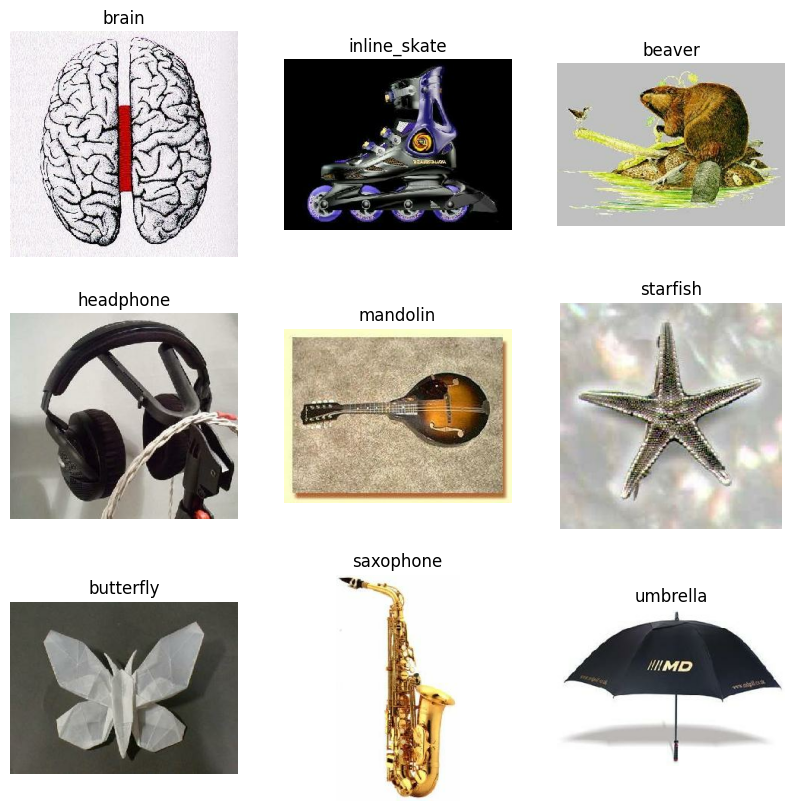

Counter({np.int64(54): 29, np.int64(46): 28, np.int64(16): 28, np.int64(47): 27, np.int64(40): 27, np.int64(52): 27, np.int64(58): 27, np.int64(72): 27, np.int64(98): 27, np.int64(96): 27, np.int64(55): 27, np.int64(29): 27, np.int64(27): 27, np.int64(100): 27, np.int64(21): 27, np.int64(94): 26, np.int64(43): 26, np.int64(15): 26, np.int64(74): 26, np.int64(59): 26, np.int64(30): 26, np.int64(84): 26, np.int64(75): 26, np.int64(20): 26, np.int64(0): 26, np.int64(51): 25, np.int64(7): 25, np.int64(45): 25, np.int64(97): 25, np.int64(36): 25, np.int64(73): 25, np.int64(17): 25, np.int64(44): 25, np.int64(65): 25, np.int64(81): 25, np.int64(31): 25, np.int64(77): 25, np.int64(89): 25, np.int64(83): 25, np.int64(13): 24, np.int64(70): 24, np.int64(8): 24, np.int64(92): 24, np.int64(23): 24, np.int64(25): 24, np.int64(39): 24, np.int64(50): 24, np.int64(12): 24, np.int64(9): 24, np.int64(28): 24, np.int64(91): 24, np.int64(53): 24, np.int64(3): 24, np.int64(68): 24, np.int64(69): 24, np.in

In [6]:
# Get class names and find the index of "google_background"
info = tfds.builder('caltech101').info
class_names = info.features['label'].names
google_background_index = class_names.index("background_google")

# Define a filter function to exclude "google_background"
def filter_google_background(image, label):
    return tf.not_equal(label, google_background_index)

# Apply the filter to each dataset split
train_data = train_data.filter(filter_google_background)
val_data = val_data.filter(filter_google_background)
test_data = test_data.filter(filter_google_background)

# Verifying the dataset sizes after filtering
print(f"Training set size after filtering: {len(list(train_data))}")
print(f"Validation set size after filtering: {len(list(val_data))}")
print(f"Test set size after filtering: {len(list(test_data))}")

# Print the first image and label from the filtered training set
for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

# Visualize a few filtered images
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

# Counting instances per class after filtering
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)

In [10]:
import tensorflow as tf
import random

# Select 10 random class indices from 101 classes
num_classes = 101
num_selected_classes = 10
selected_classes = random.sample(range(num_classes), num_selected_classes)
print("Selected classes:", selected_classes)

# Convert selected classes and mappings into tensors
selected_classes_tensor = tf.constant(selected_classes, dtype=tf.int64)
class_indices = tf.constant(range(num_selected_classes), dtype=tf.int64)

# Create a lookup table for class mapping
table_initializer = tf.lookup.KeyValueTensorInitializer(
    keys=selected_classes_tensor, values=class_indices)
class_mapping_table = tf.lookup.StaticHashTable(
    initializer=table_initializer, default_value=-1)

# Function to filter and remap labels using the lookup table
def filter_and_remap(image, label):
    # Check if label is in selected classes
    remapped_label = class_mapping_table.lookup(label)
    return image, remapped_label

# Apply filtering and remapping to each dataset
train_data = train_data.map(filter_and_remap).filter(lambda image, label: label >= 0)
val_data = val_data.map(filter_and_remap).filter(lambda image, label: label >= 0)
test_data = test_data.map(filter_and_remap).filter(lambda image, label: label >= 0)

# Proceed with the rest of the preprocessing steps
# Resize images
def resize_image(image, label):
    image = tf.image.resize(image, [128, 128])
    return image, label

train_data = train_data.map(resize_image)
val_data = val_data.map(resize_image)
test_data = test_data.map(resize_image)

# Normalize images
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize_image)
val_data = val_data.map(normalize_image)
test_data = test_data.map(normalize_image)

# Edge detection
def edge_detection(image, label):
    # Convert image to grayscale
    image_gray = tf.image.rgb_to_grayscale(image)
    # Add batch dimension to the grayscale image
    image_gray = tf.expand_dims(image_gray, axis=0)
    # Apply Sobel edge detection
    edges = tf.image.sobel_edges(image_gray)
    edge_x = edges[..., 0]
    edge_y = edges[..., 1]
    # Combine the edges
    edges = tf.sqrt(tf.square(edge_x) + tf.square(edge_y))
    # Remove the extra dimension
    edges = tf.squeeze(edges, axis=0)
    edges = tf.clip_by_value(edges, 0.0, 1.0)
    return edges, label

train_data = train_data.map(edge_detection)
val_data = val_data.map(edge_detection)
test_data = test_data.map(edge_detection)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.25),
    tf.keras.layers.RandomContrast(0.25),
    tf.keras.layers.RandomZoom(0.25),
    tf.keras.layers.RandomTranslation(0.25, 0.25)
])

# Function to apply augmentation
def augment_image(image, label):
    image = data_augmentation(image)
    return image, label

# Function to expand training data with augmentation
def expand_training_data(train_data, n_augments):
    augmented_datasets = [train_data]  # Original data

    for _ in range(n_augments):
        augmented_data = train_data.map(augment_image)
        augmented_datasets.append(augmented_data)

    # Concatenate the original and augmented datasets
    full_train_data = augmented_datasets[0]
    for aug_data in augmented_datasets[1:]:
        full_train_data = full_train_data.concatenate(aug_data)

    return full_train_data

# Generate expanded training data
train_data = expand_training_data(train_data, n_augments=1)
train_data_size = len(list(train_data))
train_data = train_data.shuffle(buffer_size=train_data_size)

# Apply batching and prefetching without one-hot encoding
train_data = train_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_data = val_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)


Selected classes: [57, 58, 92, 98, 52, 53, 79, 34, 72, 76]


In [11]:
print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

Training set size: 15
Validation set size: 1


2024-10-30 19:26:05.877478: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Test set size: 13
Image shape: (32, 128, 128, 1)
Label: [5 2 5 9 3 4 4 4 2 1 2 5 1 0 0 1 2 0 8 6 3 4 9 3 5 7 8 0 0 0 0 3]


In [12]:

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 7s 290ms/step - accuracy: 0.1311 - loss: 3.5128

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - accuracy: 0.1314 - loss: 3.4667 - val_accuracy: 0.2500 - val_loss: 0.9963
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 295ms/step - accuracy: 0.2494 - loss: 2.1576 - val_accuracy: 0.1406 - val_loss: 0.8284
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.3243 - loss: 1.9533 - val_accuracy: 0.2031 - val_loss: 0.7686
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - accuracy: 0.3904 - loss: 1.7741 - val_accuracy: 0.2500 - val_loss: 0.7375
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.4699 - loss: 1.6092 - val_accuracy: 0.3125 - val_loss: 0.5845
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.5483 - loss: 1.3918 - val_accuracy: 0.3281 - val_loss: 0.5635
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.5102 - loss: 1.4795 - val_accuracy: 0.3438 - val_loss: 0.5548
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - accuracy: 0.5423 - loss: 1.3948 - val_accuracy: 0.2344 - val

2024-10-30 19:26:53.948654: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.5769 - loss: 1.3526 - val_accuracy: 0.2812 - val_loss: 0.6421
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 295ms/step - accuracy: 0.5665 - loss: 1.2816 - val_accuracy: 0.3125 - val_loss: 0.6358


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Accuracy: 58.65%


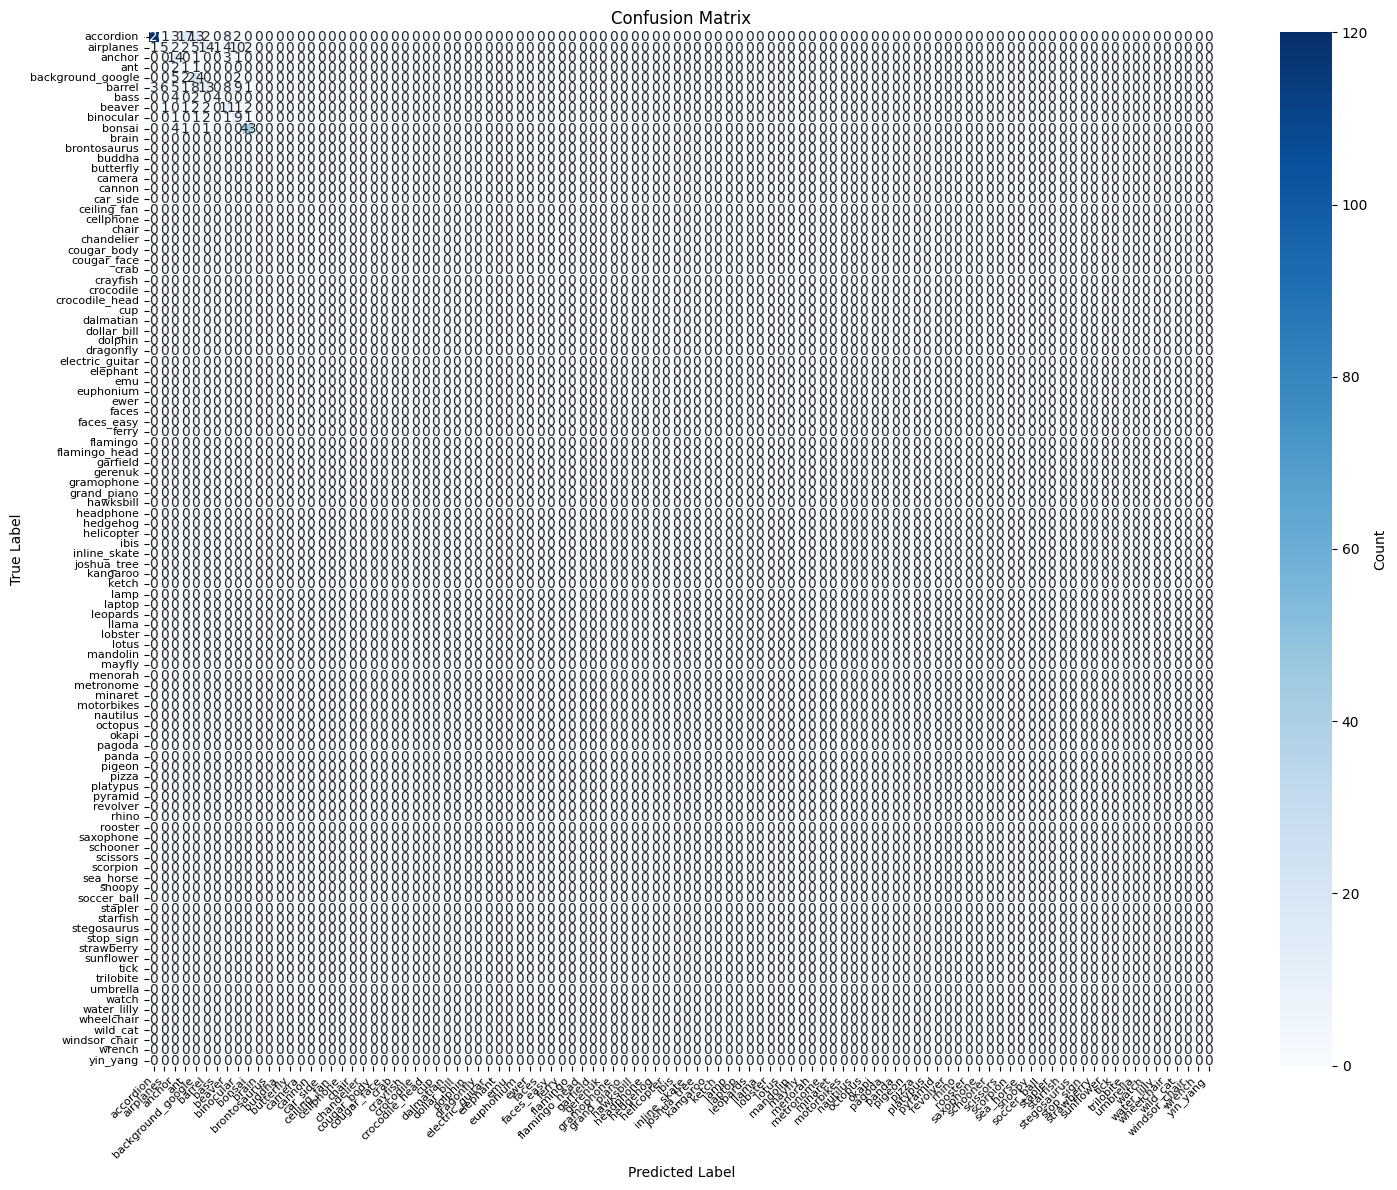

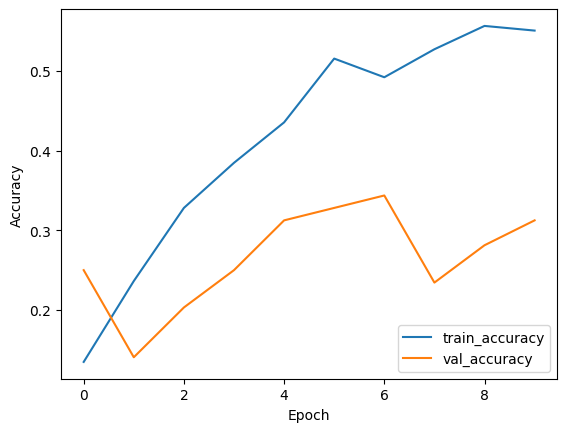

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def print_results():
    # Extract test images and labels from the test dataset
    test_images, test_labels = zip(*[(image, label) for image, label in tfds.as_numpy(test_data)])
    test_images = np.array([image for batch in test_images for image in batch])
    test_labels = np.array([label for batch in test_labels for label in batch])

    # Generate predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Calculate accuracy manually
    accuracy = np.sum(predicted_classes == test_labels) / len(test_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Calculate confusion matrix
    num_classes = len(class_names)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(test_labels, predicted_classes):
        confusion_matrix[true, pred] += 1

    # Plot confusion matrix
    plt.figure(figsize=(15, 12))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Count'})
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    # Plot training history
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
print_results()


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 6s 243ms/step - accuracy: 0.0775 - loss: 4.4170

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - accuracy: 0.0783 - loss: 4.3852 - val_accuracy: 0.0469 - val_loss: 1.6902
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.1065 - loss: 3.2842 - val_accuracy: 0.1094 - val_loss: 1.2403
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step - accuracy: 0.1545 - loss: 2.4361 - val_accuracy: 0.1875 - val_loss: 0.9351
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step - accuracy: 0.2314 - loss: 2.1970 - val_accuracy: 0.1719 - val_loss: 0.9106
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.3042 - loss: 2.0382 - val_accuracy: 0.1719 - val_loss: 0.8412
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.3670 - loss: 1.8795 - val_accuracy: 0.1719 - val_loss: 0.9161
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step - accuracy: 0.3434 - loss: 1.8796 - val_accuracy: 0.2188 - val_loss: 0.7126
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 314ms/step - accuracy: 0.3601 - loss: 1.8451 - val_accuracy: 0.2812 - val_

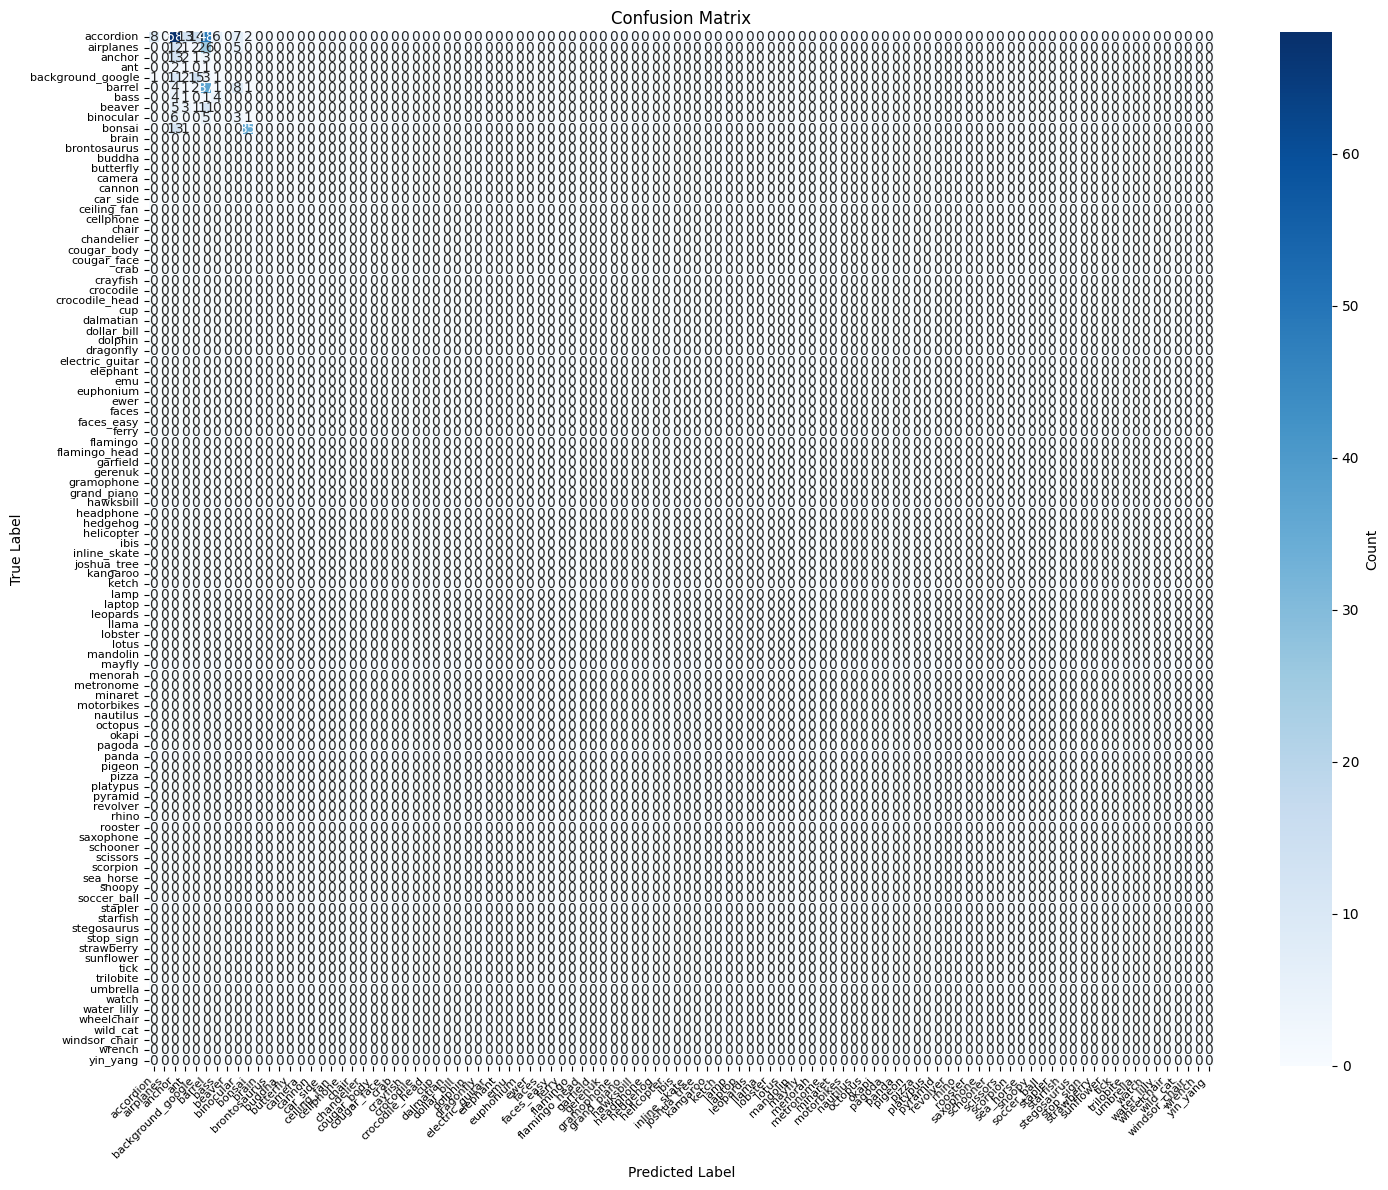

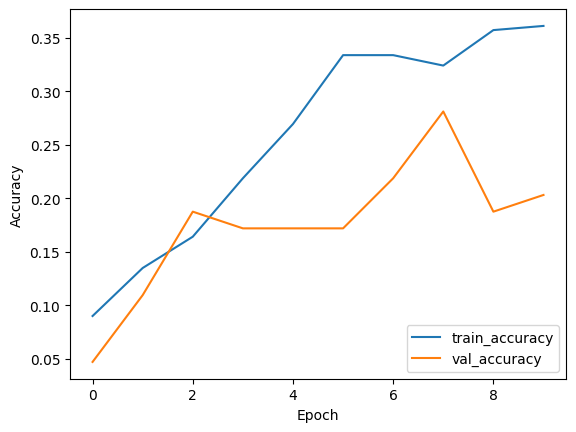

In [14]:

# model with slower learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()



Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 7s 264ms/step - accuracy: 0.0917 - loss: 8.0081

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step - accuracy: 0.0922 - loss: 7.7985 - val_accuracy: 0.0156 - val_loss: 1.2310
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - accuracy: 0.1322 - loss: 2.3529 - val_accuracy: 0.0781 - val_loss: 1.1266
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.1420 - loss: 2.3079

2024-10-30 19:28:33.307473: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.1419 - loss: 2.2972 - val_accuracy: 0.1250 - val_loss: 1.0851
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.2112 - loss: 2.0861 - val_accuracy: 0.1719 - val_loss: 0.8614
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.2684 - loss: 2.0259 - val_accuracy: 0.2188 - val_loss: 0.9139
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.3058 - loss: 1.9696 - val_accuracy: 0.2188 - val_loss: 0.7982
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.3322 - loss: 1.9250 - val_accuracy: 0.1719 - val_loss: 0.9116
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.3540 - loss: 1.8461 - val_accuracy: 0.1406 - val_loss: 0.8158
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - accuracy: 0.3577 - loss: 1.8558 - val_accuracy: 0.1875 - val_loss: 0.7731
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.3473 - loss: 1.8349 - val_accuracy: 0.1875 - val

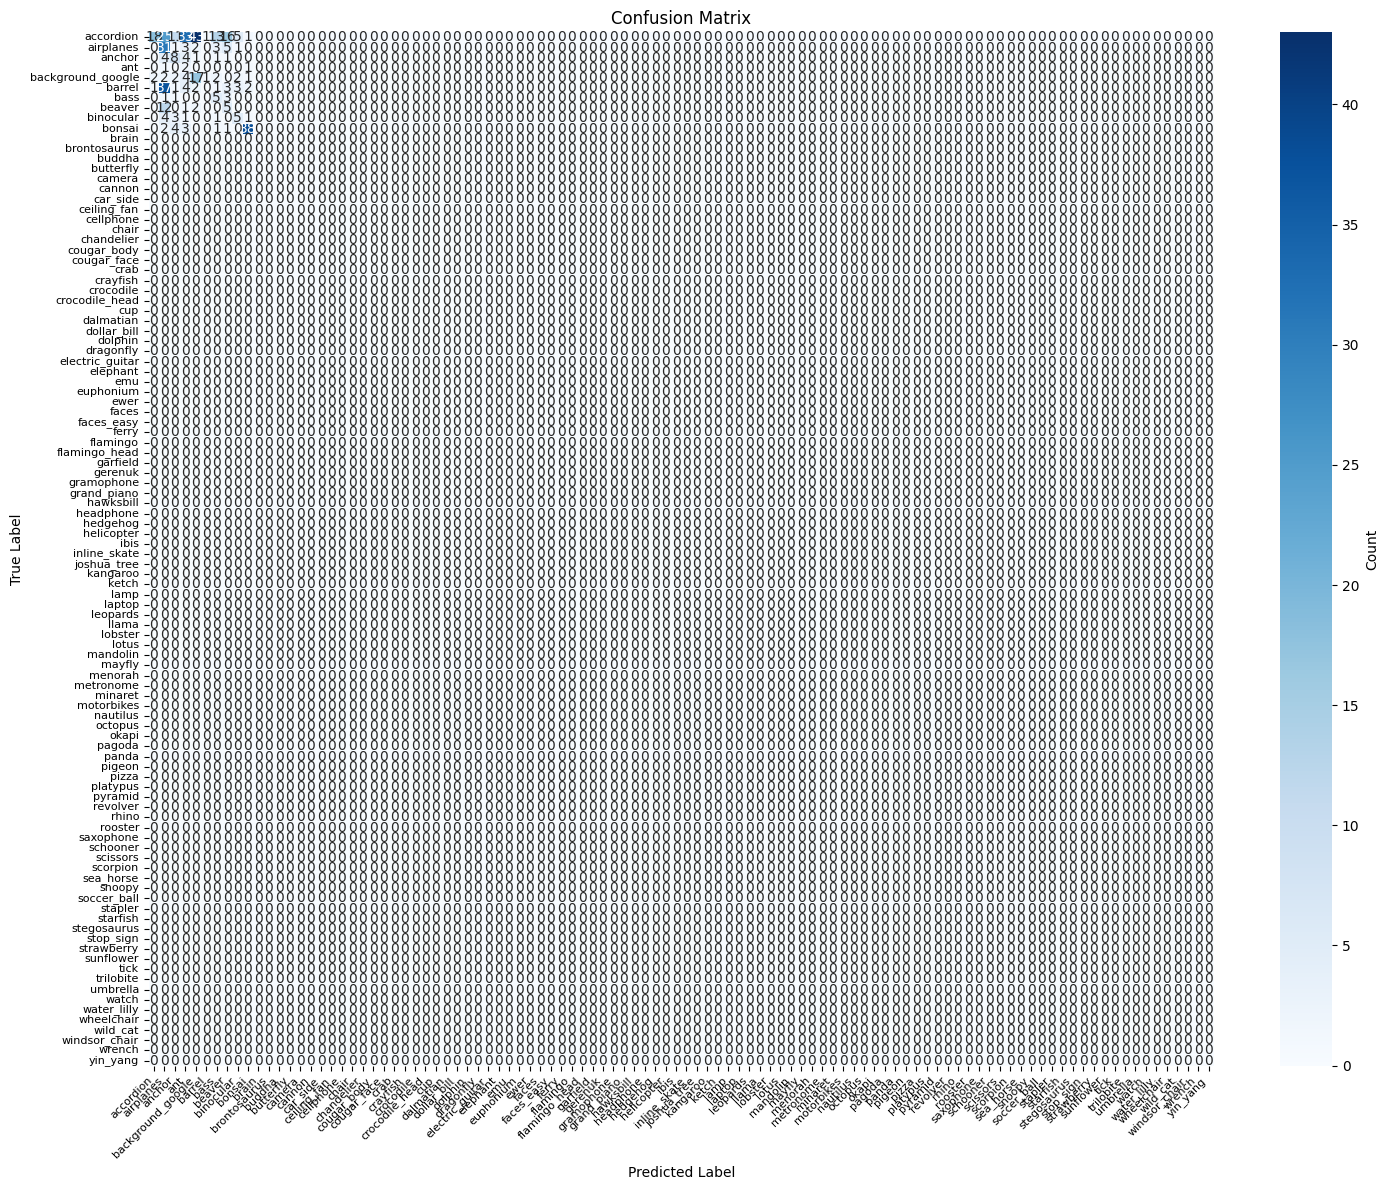

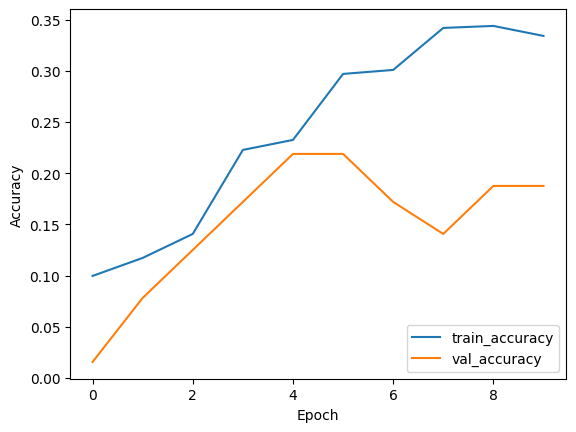

In [15]:

# model with faster learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 7s 296ms/step - accuracy: 0.0688 - loss: 3.9249

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - accuracy: 0.0701 - loss: 3.8805 - val_accuracy: 0.0469 - val_loss: 1.2268
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 307ms/step - accuracy: 0.1471 - loss: 2.5802 - val_accuracy: 0.1719 - val_loss: 0.9744
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step - accuracy: 0.2122 - loss: 2.2626 - val_accuracy: 0.2500 - val_loss: 0.8692
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step - accuracy: 0.3500 - loss: 1.9216 - val_accuracy: 0.2188 - val_loss: 0.7218
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.3534 - loss: 1.8325 - val_accuracy: 0.2500 - val_loss: 0.6666
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - accuracy: 0.3893 - loss: 1.7742 - val_accuracy: 0.3594 - val_loss: 0.5478
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 287ms/step - accuracy: 0.5051 - loss: 1.5568 - val_accuracy: 0.3438 - val_loss: 0.5654
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.5130 - loss: 1.4927 - val_accuracy: 0.2500 - val

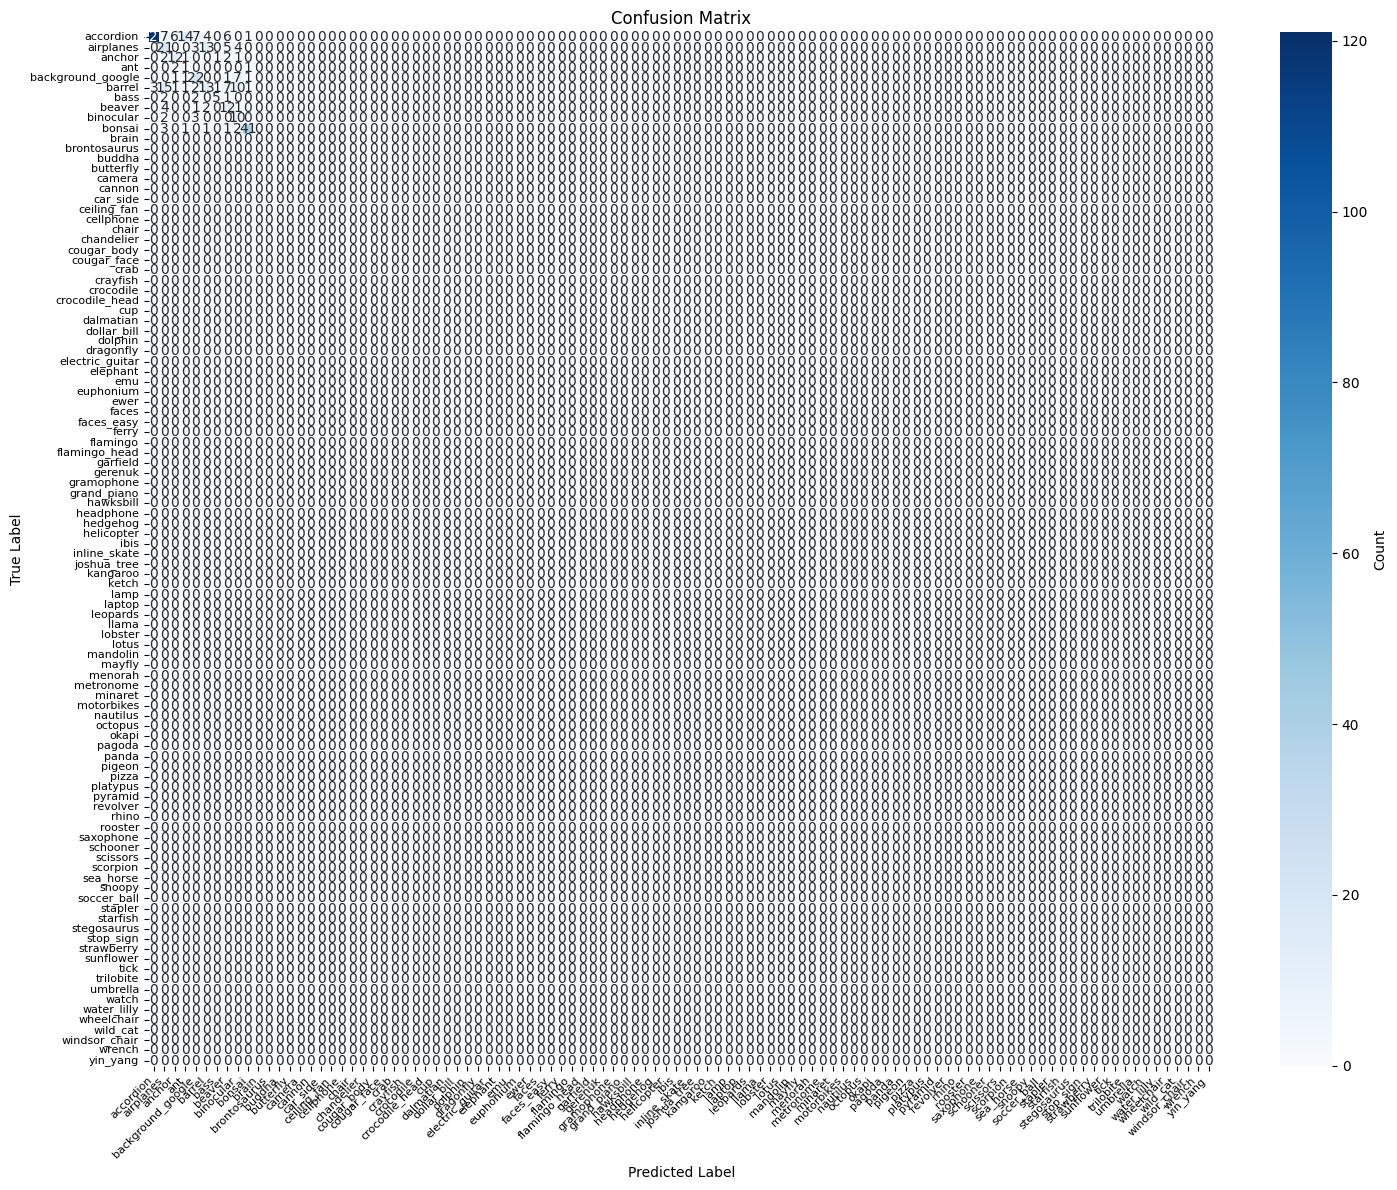

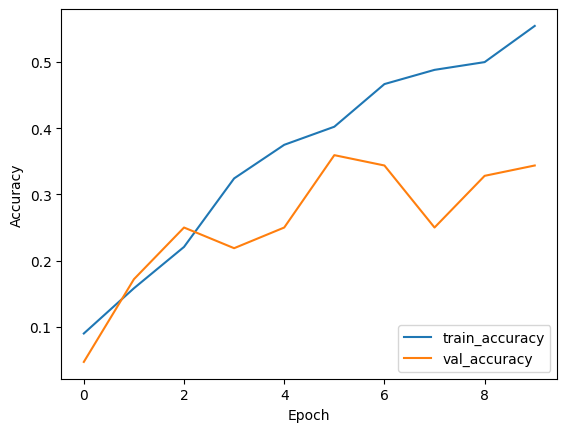

In [16]:

# model with dropout 0.2
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/30


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 7s 292ms/step - accuracy: 0.0894 - loss: 3.7705

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 379ms/step - accuracy: 0.0909 - loss: 3.7249 - val_accuracy: 0.1406 - val_loss: 1.1478
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 392ms/step - accuracy: 0.1732 - loss: 2.5874 - val_accuracy: 0.1719 - val_loss: 0.9848
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 467ms/step - accuracy: 0.2240 - loss: 2.2163 - val_accuracy: 0.2656 - val_loss: 0.7438
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 494ms/step - accuracy: 0.3291 - loss: 2.0073 - val_accuracy: 0.2656 - val_loss: 0.6729
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 414ms/step - accuracy: 0.3715 - loss: 1.8926 - val_accuracy: 0.3281 - val_loss: 0.5358
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 431ms/step - accuracy: 0.5034 - loss: 1.5426 - val_accuracy: 0.2812 - val_loss: 0.5910
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 413ms/step - accuracy: 0.5273 - loss: 1.5712 - val_accuracy: 0.3750 - val_loss: 0.4935
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 518ms/step - accuracy: 0.5453 - loss: 1.4465 - val_accuracy: 0.3125 - val

2024-10-30 19:32:27.542367: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 367ms/step - accuracy: 0.6060 - loss: 1.2300 - val_accuracy: 0.3750 - val_loss: 0.4177
Epoch 15/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 374ms/step - accuracy: 0.5812 - loss: 1.2829 - val_accuracy: 0.3281 - val_loss: 0.5008
Epoch 16/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 402ms/step - accuracy: 0.5976 - loss: 1.1957 - val_accuracy: 0.3281 - val_loss: 0.5359
Epoch 17/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 390ms/step - accuracy: 0.6078 - loss: 1.1867 - val_accuracy: 0.3594 - val_loss: 0.4246
Epoch 18/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 416ms/step - accuracy: 0.6058 - loss: 1.1229 - val_accuracy: 0.3594 - val_loss: 0.4759
Epoch 19/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 456ms/step - accuracy: 0.6562 - loss: 0.9952 - val_accuracy: 0.3281 - val_loss: 0.4881
Epoch 20/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - accuracy: 0.6282 - loss: 1.0644 - val_accuracy: 0.3750 - val_loss: 0.4930
Epoch 21/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.6158 - loss: 1.1332 - val_accuracy: 0.3438

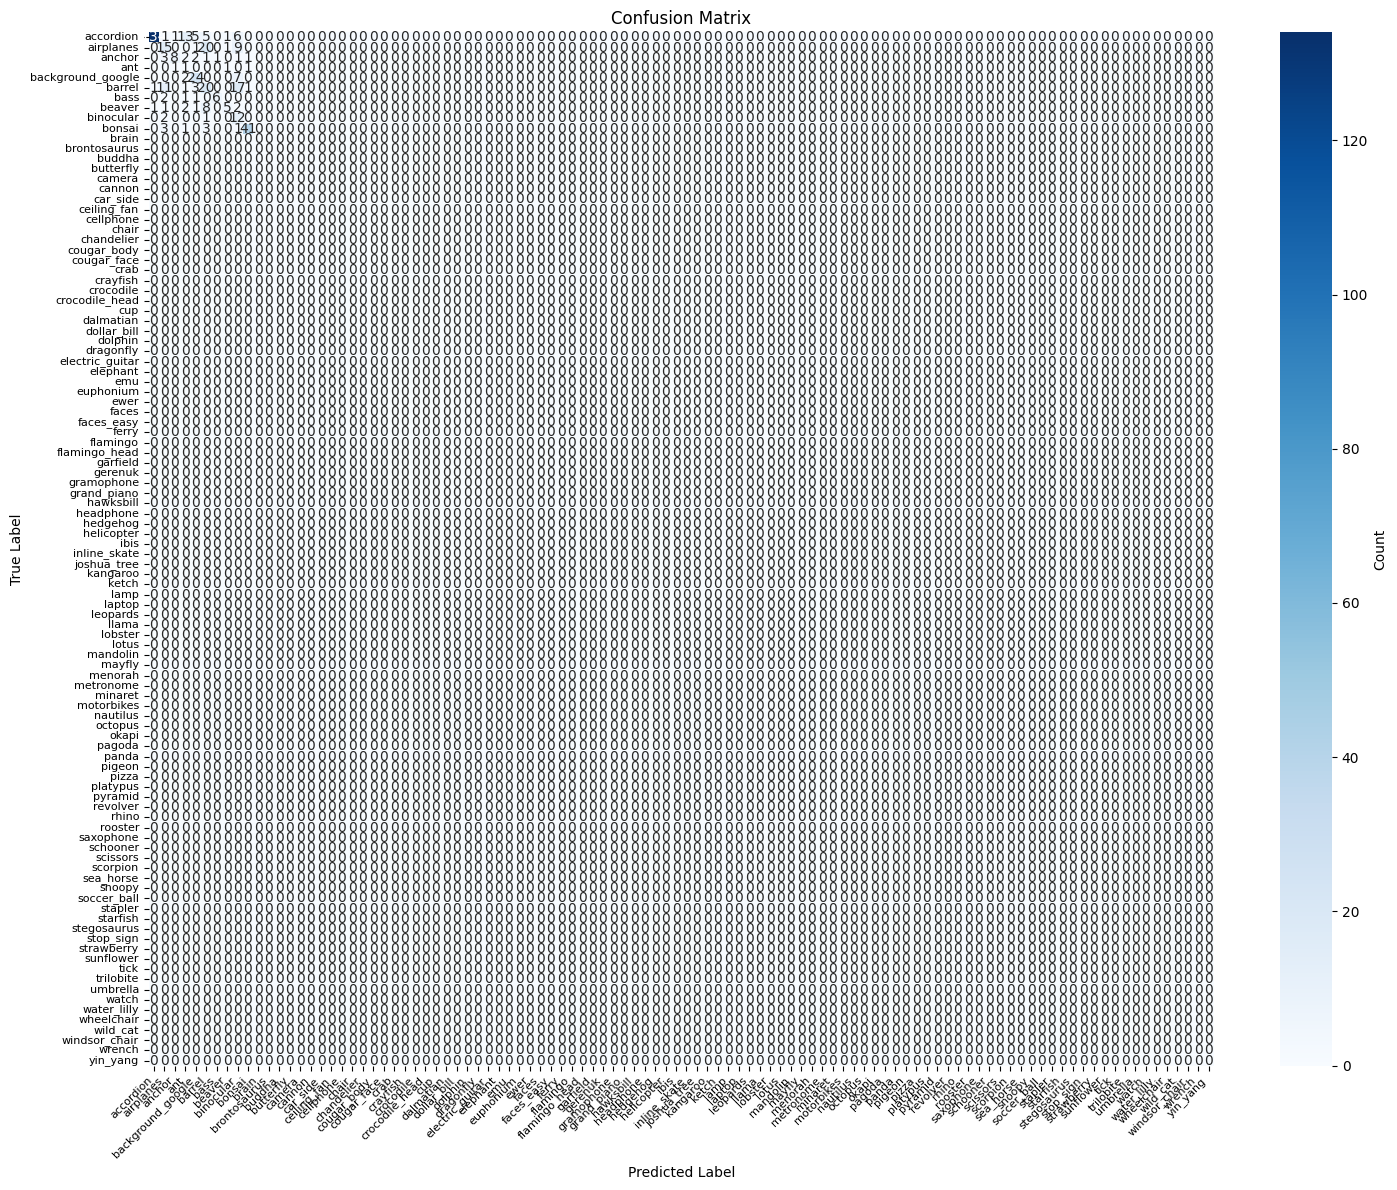

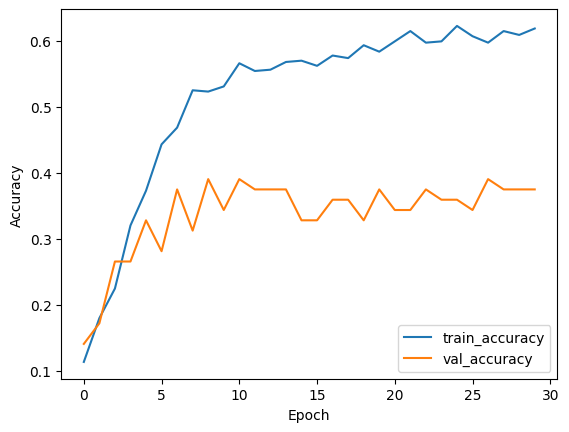

In [17]:

# model with dropout 0.2 + 30 epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=30, validation_data=val_data)

print_results()


Epoch 1/30


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/60 ━━━━━━━━━━━━━━━━━━━━ 14s 315ms/step - accuracy: 0.0829 - loss: 3.6566

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.1013 - loss: 3.0428 - val_accuracy: 0.0469 - val_loss: 1.1458
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.1686 - loss: 2.2318 - val_accuracy: 0.1250 - val_loss: 1.0578
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.2292 - loss: 2.0195 - val_accuracy: 0.0938 - val_loss: 0.9777
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.2447 - loss: 1.9124 - val_accuracy: 0.2031 - val_loss: 0.8632
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.3016 - loss: 1.8275 - val_accuracy: 0.2344 - val_loss: 0.7658
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.3843 - loss: 1.6846 - val_accuracy: 0.2188 - val_loss: 0.7129
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.4094 - loss: 1.5728 - val_accuracy: 0.2812 - val_loss: 0.6514
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.4805 - loss: 1.4991 - val_accuracy: 0.1562 - val_loss: 0

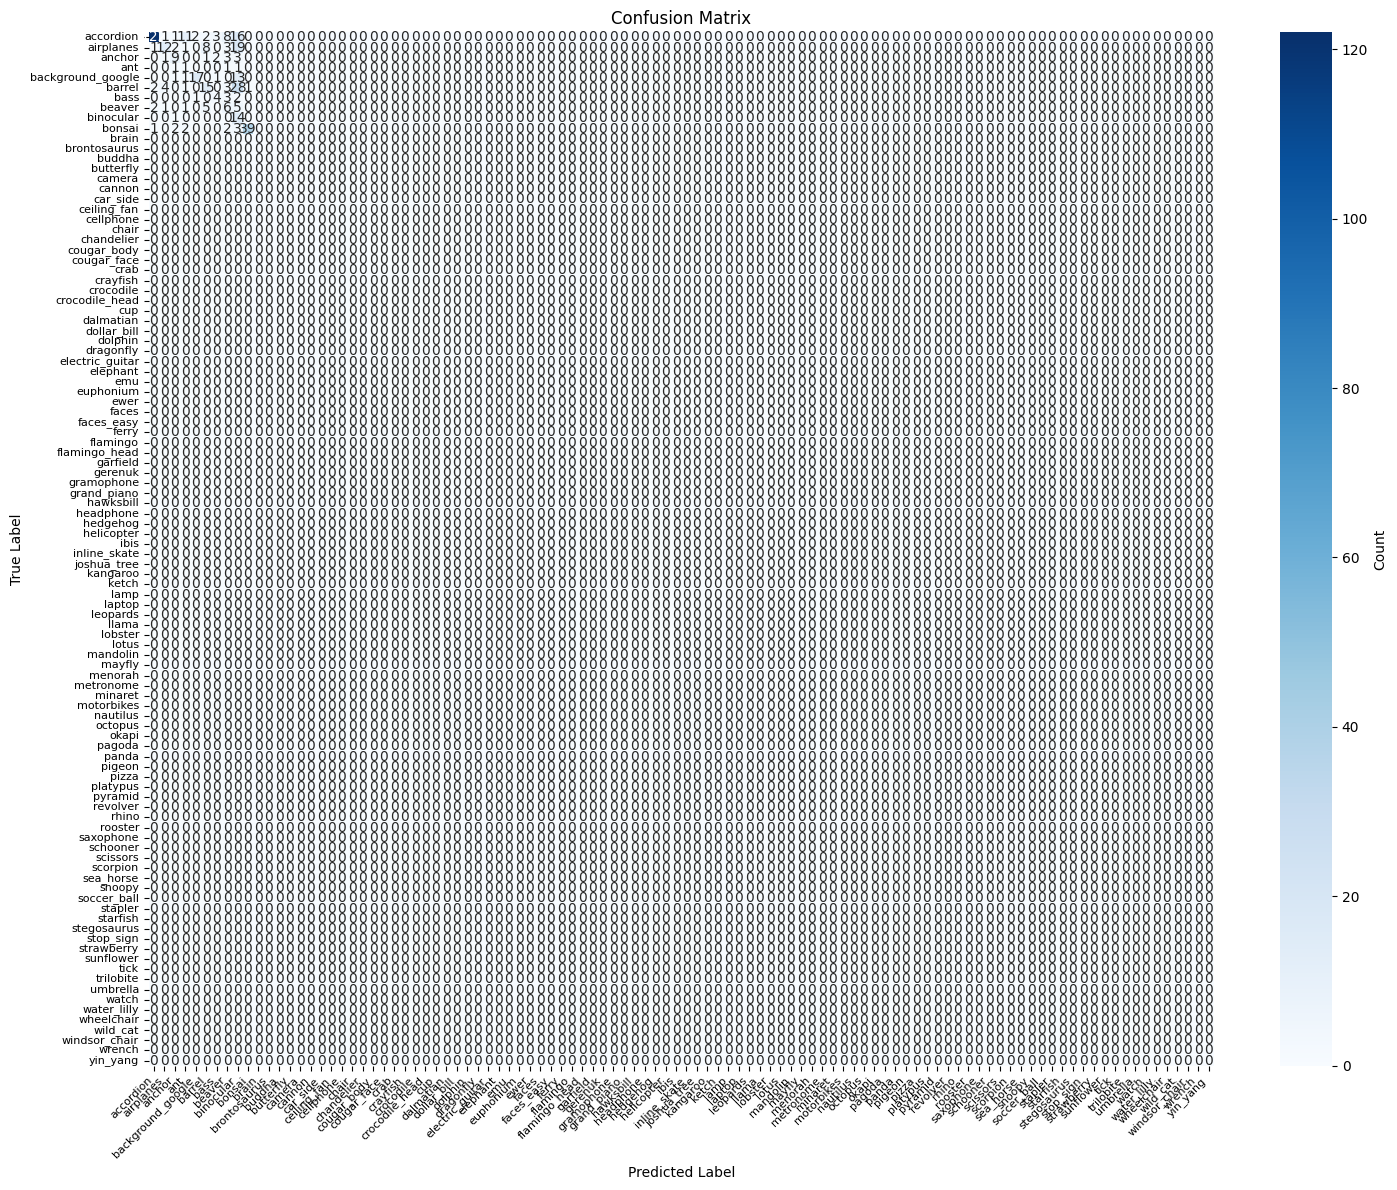

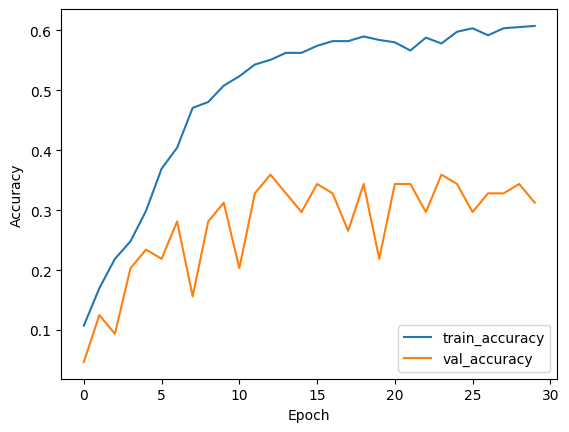

In [18]:
def create_model():
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                            input_shape=(128, 128, 1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))   

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

model = create_model()
history = model.fit(train_data, steps_per_epoch=60, epochs=30, validation_data=val_data, validation_steps=20)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 13s 577ms/step - accuracy: 0.0936 - loss: 3.6970

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 612ms/step - accuracy: 0.0947 - loss: 3.6551 - val_accuracy: 0.1250 - val_loss: 1.1958
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 552ms/step - accuracy: 0.0659 - loss: 2.5327 - val_accuracy: 0.0312 - val_loss: 1.2607
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 500ms/step - accuracy: 0.1673 - loss: 2.3708 - val_accuracy: 0.0781 - val_loss: 1.0521
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 485ms/step - accuracy: 0.1598 - loss: 2.2790 - val_accuracy: 0.1406 - val_loss: 1.0045
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 440ms/step - accuracy: 0.1915 - loss: 2.1547 - val_accuracy: 0.1250 - val_loss: 0.9659
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 490ms/step - accuracy: 0.2262 - loss: 2.1365 - val_accuracy: 0.1719 - val_loss: 0.9218
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 498ms/step - accuracy: 0.2463 - loss: 2.1056 - val_accuracy: 0.1250 - val_loss: 0.8296
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 584ms/step - accuracy: 0.3197 - loss: 1.9448 - val_accuracy: 0.1719 - v

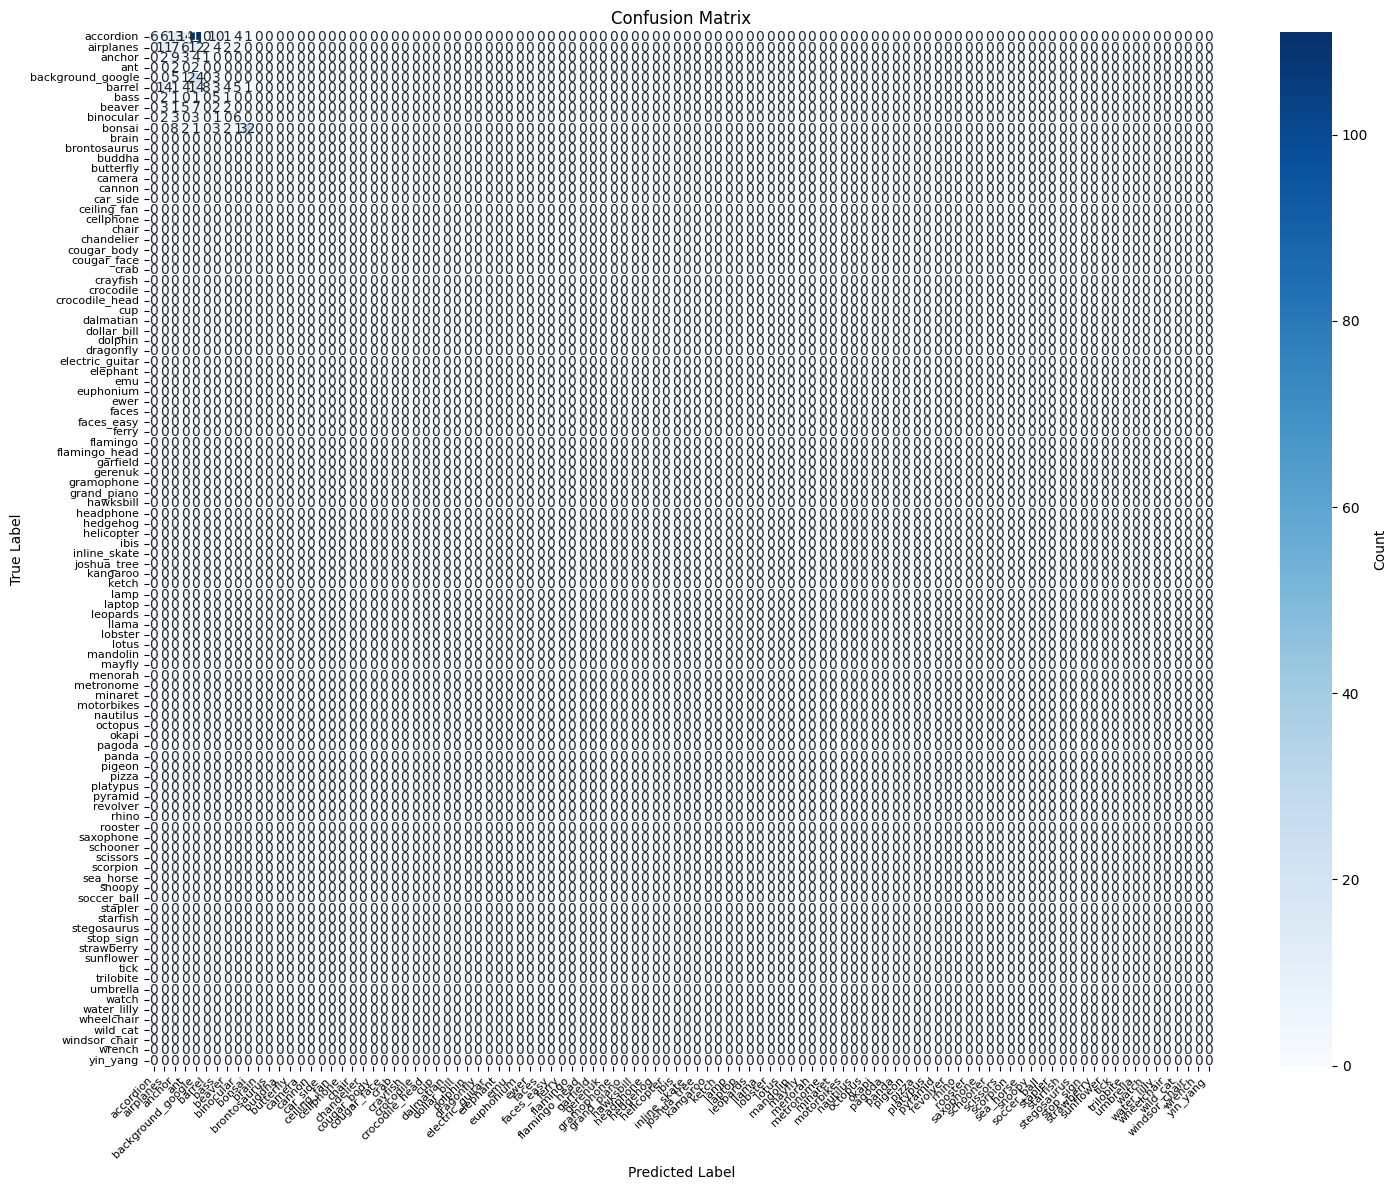

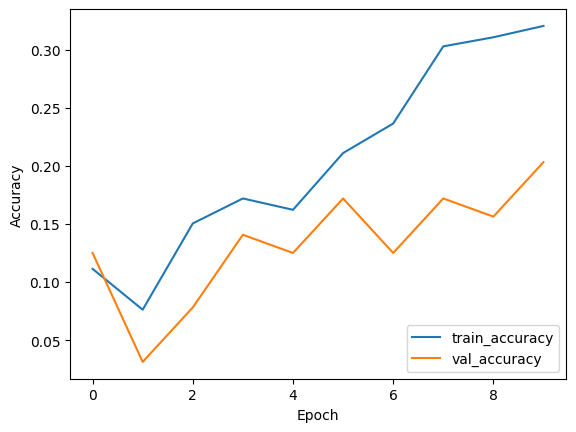

In [19]:
# model with more layers with more units

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
    
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),        
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Increased dense layer size
        tf.keras.layers.Dropout(0.1),  # Higher dropout to regularize
        
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 13s 603ms/step - accuracy: 0.1204 - loss: 3.5464

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 649ms/step - accuracy: 0.1194 - loss: 3.5070 - val_accuracy: 0.0156 - val_loss: 1.3271
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 522ms/step - accuracy: 0.1227 - loss: 2.4404 - val_accuracy: 0.0625 - val_loss: 1.1996
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 538ms/step - accuracy: 0.1189 - loss: 2.3032 - val_accuracy: 0.1406 - val_loss: 1.1680
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 599ms/step - accuracy: 0.1119 - loss: 2.2900 - val_accuracy: 0.1250 - val_loss: 1.1106
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 527ms/step - accuracy: 0.1564 - loss: 2.2005 - val_accuracy: 0.1250 - val_loss: 0.9729
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 495ms/step - accuracy: 0.1976 - loss: 2.1498 - val_accuracy: 0.1406 - val_loss: 1.0281
Epoch 7/10


2024-10-30 19:41:55.723809: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 398ms/step - accuracy: 0.2171 - loss: 2.1132 - val_accuracy: 0.1250 - val_loss: 0.9148
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 540ms/step - accuracy: 0.2952 - loss: 1.9974 - val_accuracy: 0.1406 - val_loss: 0.8936
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 510ms/step - accuracy: 0.2770 - loss: 2.0170 - val_accuracy: 0.1719 - val_loss: 0.8935
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 530ms/step - accuracy: 0.2772 - loss: 1.9958 - val_accuracy: 0.2031 - val_loss: 0.7988
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step
Accuracy: 27.16%


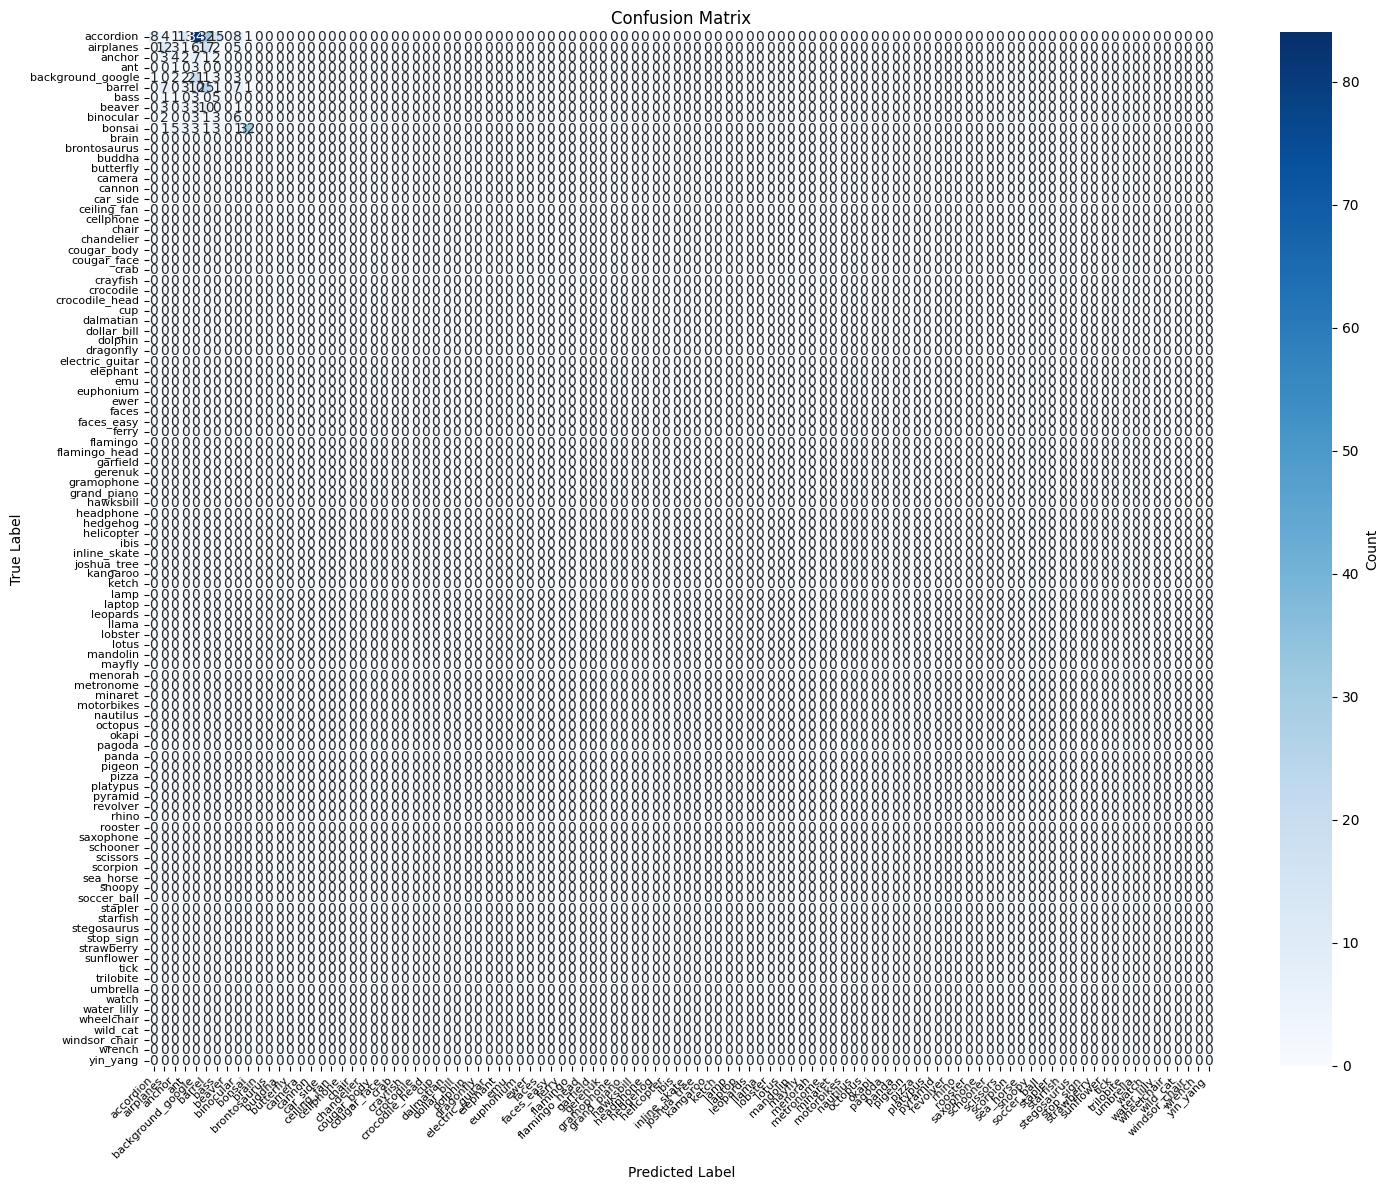

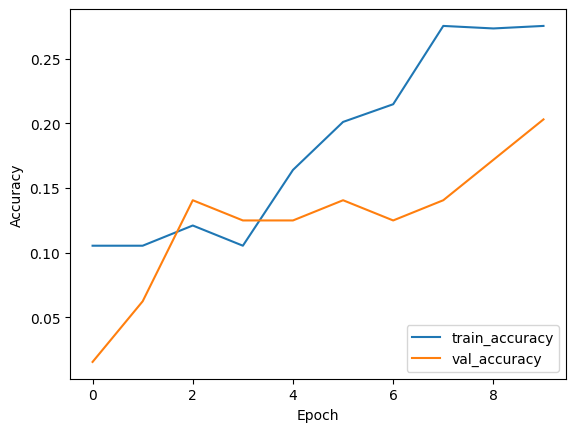

In [20]:
# model with more dropout and more layers with more units

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),  # Increased dense layer size
        tf.keras.layers.Dropout(0.1),  # Higher dropout to regularize
        
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 6s 158ms/step - accuracy: 0.0819 - loss: 3.9566

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 0.0830 - loss: 3.9079 - val_accuracy: 0.0156 - val_loss: 1.2256
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.0840 - loss: 2.5985 - val_accuracy: 0.0781 - val_loss: 1.1521
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 0.1450 - loss: 2.4250 - val_accuracy: 0.1250 - val_loss: 1.0238
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 0.2010 - loss: 2.2672 - val_accuracy: 0.1250 - val_loss: 0.9758
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.1770 - loss: 2.2242 - val_accuracy: 0.1562 - val_loss: 0.9369
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.2528 - loss: 2.1144 - val_accuracy: 0.1562 - val_loss: 0.8703
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.2422 - loss: 2.0399 - val_accuracy: 0.2188 - val_loss: 0.7943
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.2889 - loss: 1.9874 - val_accuracy: 0.1875 - val_

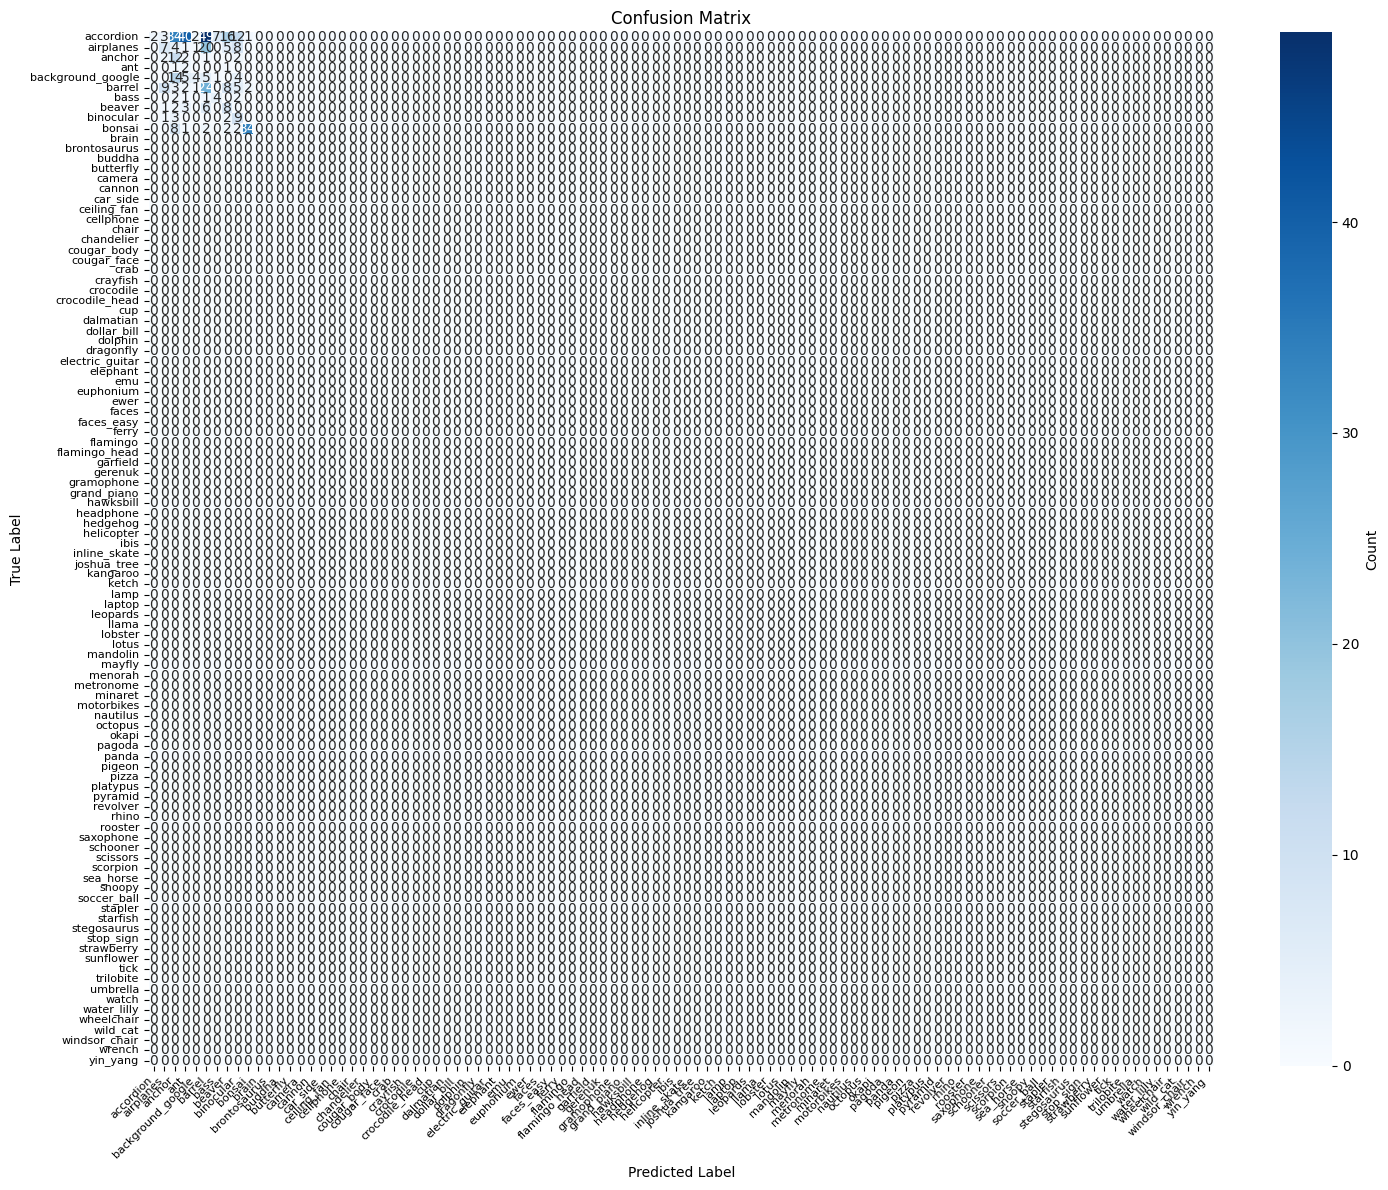

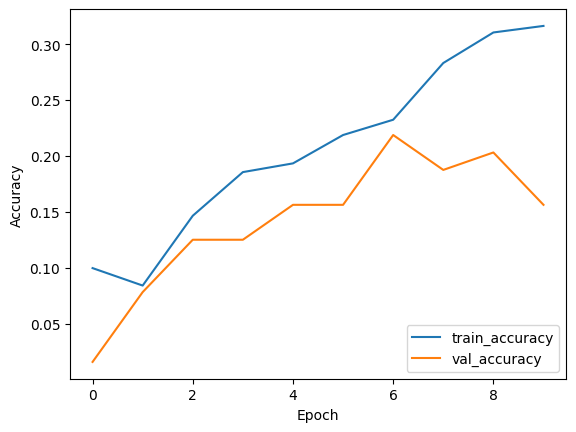

In [21]:

# model with dropout 0.2 and pooling 3x3
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 9s 350ms/step - accuracy: 0.0823 - loss: 3.8542

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 375ms/step - accuracy: 0.0834 - loss: 3.8146 - val_accuracy: 0.1406 - val_loss: 1.2969
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step - accuracy: 0.1541 - loss: 2.6154 - val_accuracy: 0.1562 - val_loss: 1.0620
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 402ms/step - accuracy: 0.2412 - loss: 2.2817 - val_accuracy: 0.2031 - val_loss: 0.8582
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 394ms/step - accuracy: 0.3268 - loss: 1.9168 - val_accuracy: 0.2344 - val_loss: 0.7302
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 386ms/step - accuracy: 0.3818 - loss: 1.8444 - val_accuracy: 0.2344 - val_loss: 0.6488
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 397ms/step - accuracy: 0.4422 - loss: 1.7238 - val_accuracy: 0.2812 - val_loss: 0.6316
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 407ms/step - accuracy: 0.4471 - loss: 1.7016 - val_accuracy: 0.3438 - val_loss: 0.5274
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.4917 - loss: 1.5819 - val_accuracy: 0.3594 - val_

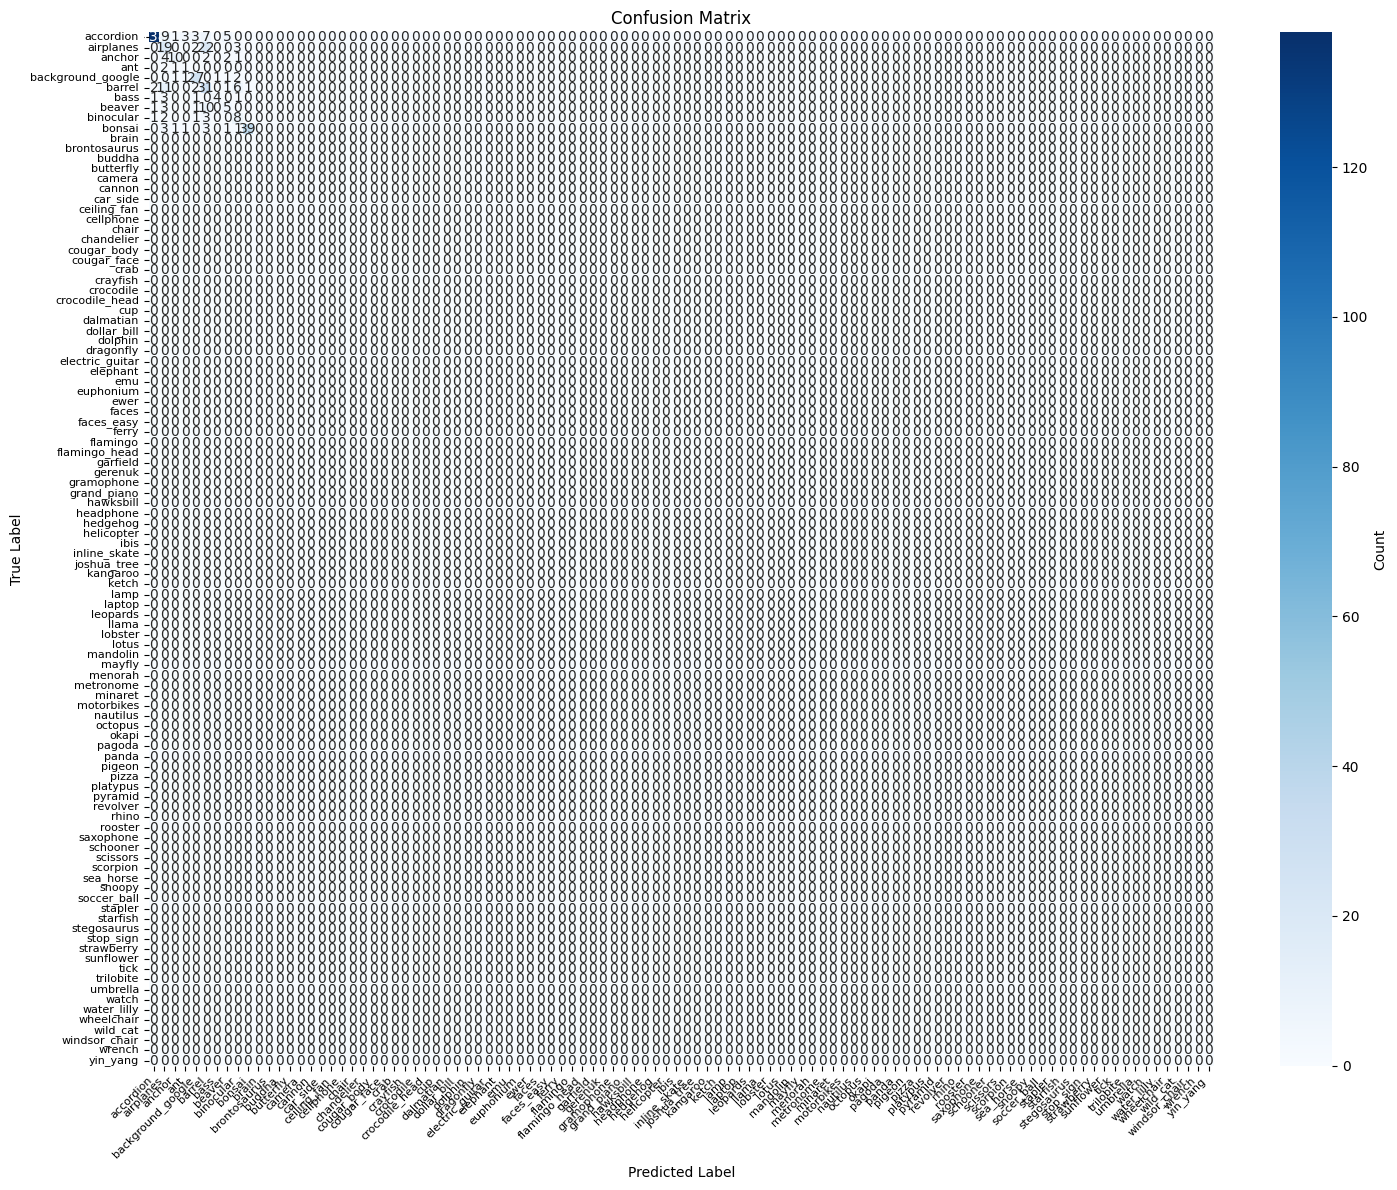

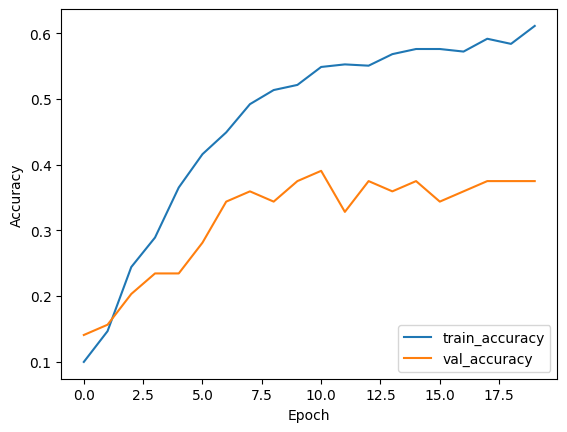

In [22]:

# model with dropout 0.2 and more epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 5s 160ms/step - accuracy: 0.0597 - loss: 4.0040

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.0608 - loss: 3.9577 - val_accuracy: 0.1094 - val_loss: 1.2011
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.1144 - loss: 2.6867 - val_accuracy: 0.0625 - val_loss: 1.1598
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.1319 - loss: 2.4832 - val_accuracy: 0.1094 - val_loss: 1.0523
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.2224 - loss: 2.2663 - val_accuracy: 0.1875 - val_loss: 0.9935
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.2154 - loss: 2.1708 - val_accuracy: 0.1875 - val_loss: 0.9383
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.2923 - loss: 2.0397 - val_accuracy: 0.1406 - val_loss: 0.9089
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.2682 - loss: 2.0178 - val_accuracy: 0.1875 - val_loss: 0.8573
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.2505 - loss: 2.0203 - val_accuracy: 0.1406 - val_

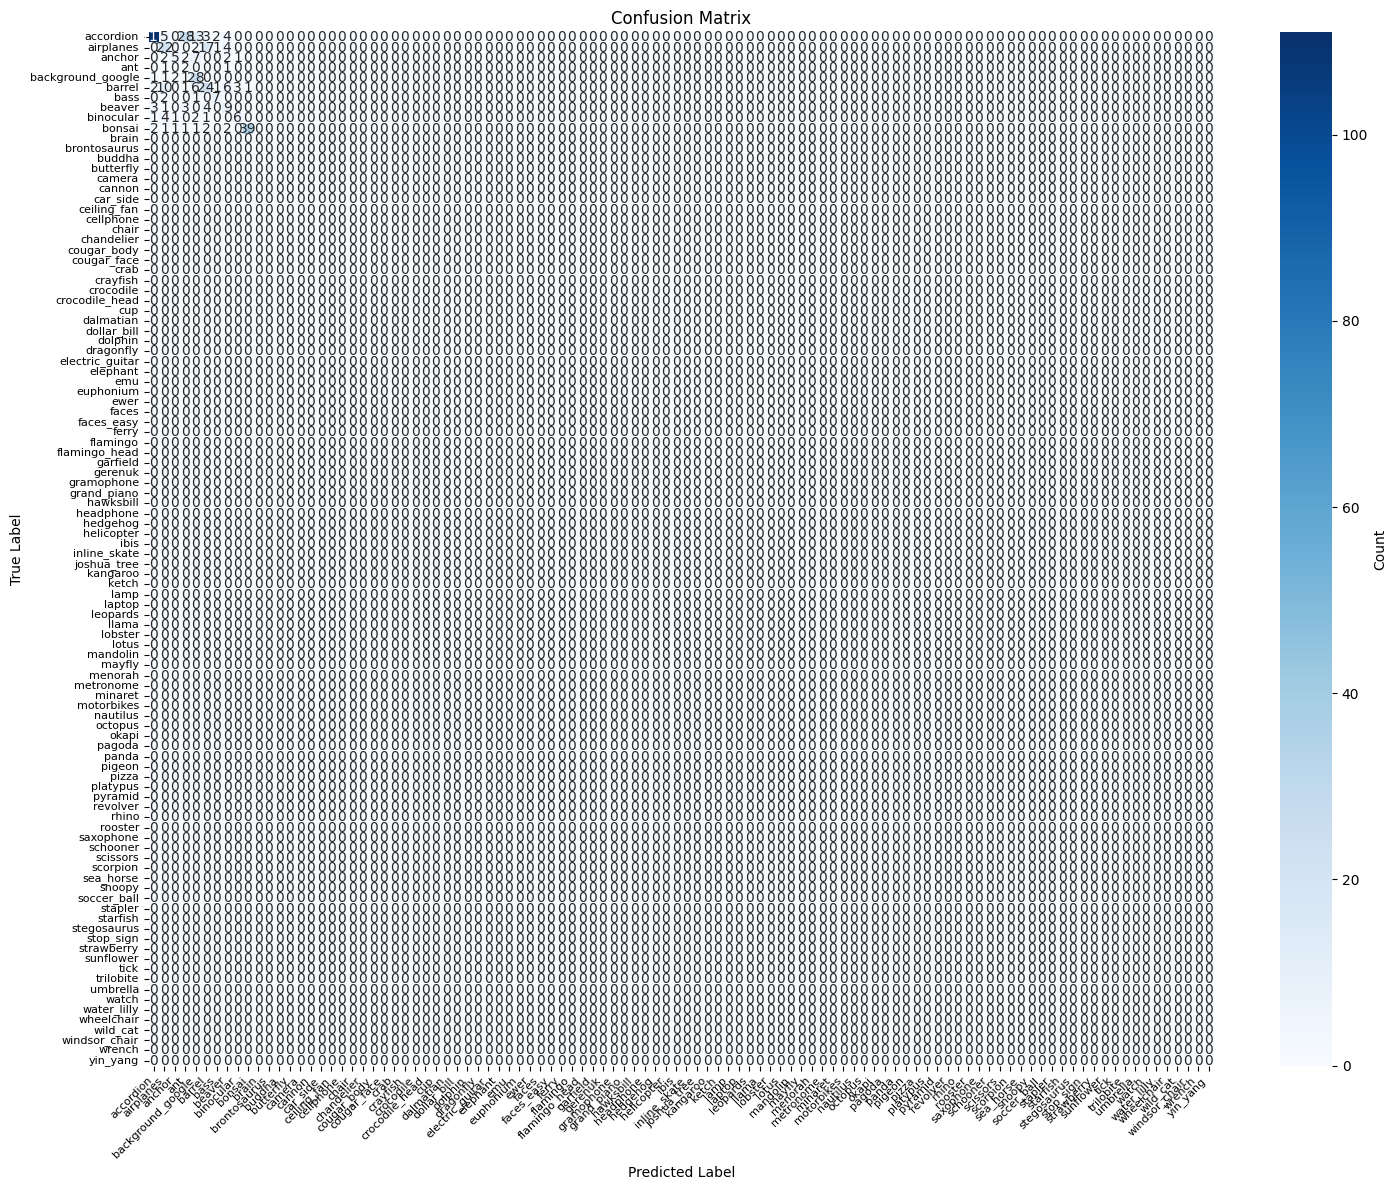

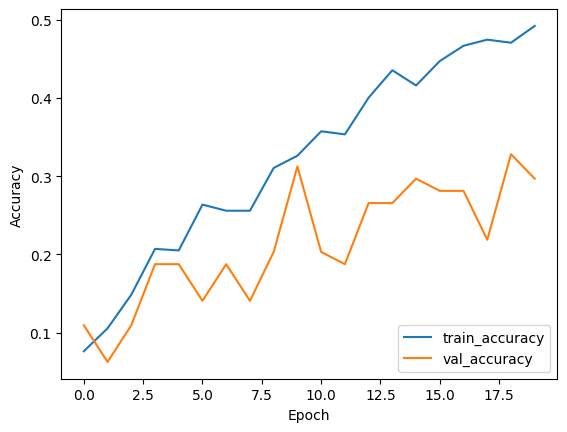

In [23]:
# model with dropout 0.2 and pooling 3x3 and more epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 19s 703ms/step - accuracy: 0.0596 - loss: 5.0699

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 750ms/step - accuracy: 0.0621 - loss: 5.0381 - val_accuracy: 0.1250 - val_loss: 2.1307
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 701ms/step - accuracy: 0.3274 - loss: 3.4909 - val_accuracy: 0.1250 - val_loss: 2.4739
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 649ms/step - accuracy: 0.3142 - loss: 3.1160 - val_accuracy: 0.1250 - val_loss: 3.1534
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 707ms/step - accuracy: 0.4211 - loss: 2.6746 - val_accuracy: 0.1250 - val_loss: 3.8921
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 854ms/step - accuracy: 0.4264 - loss: 2.9389 - val_accuracy: 0.1250 - val_loss: 4.3769
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 800ms/step - accuracy: 0.4493 - loss: 2.6368 - val_accuracy: 0.1250 - val_loss: 4.3641
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 700ms/step - accuracy: 0.4475 - loss: 2.6678 - val_accuracy: 0.1250 - val_loss: 4.1202
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 504ms/step - accuracy: 0.5131 - loss: 2.3225 - val_accuracy: 0.0312

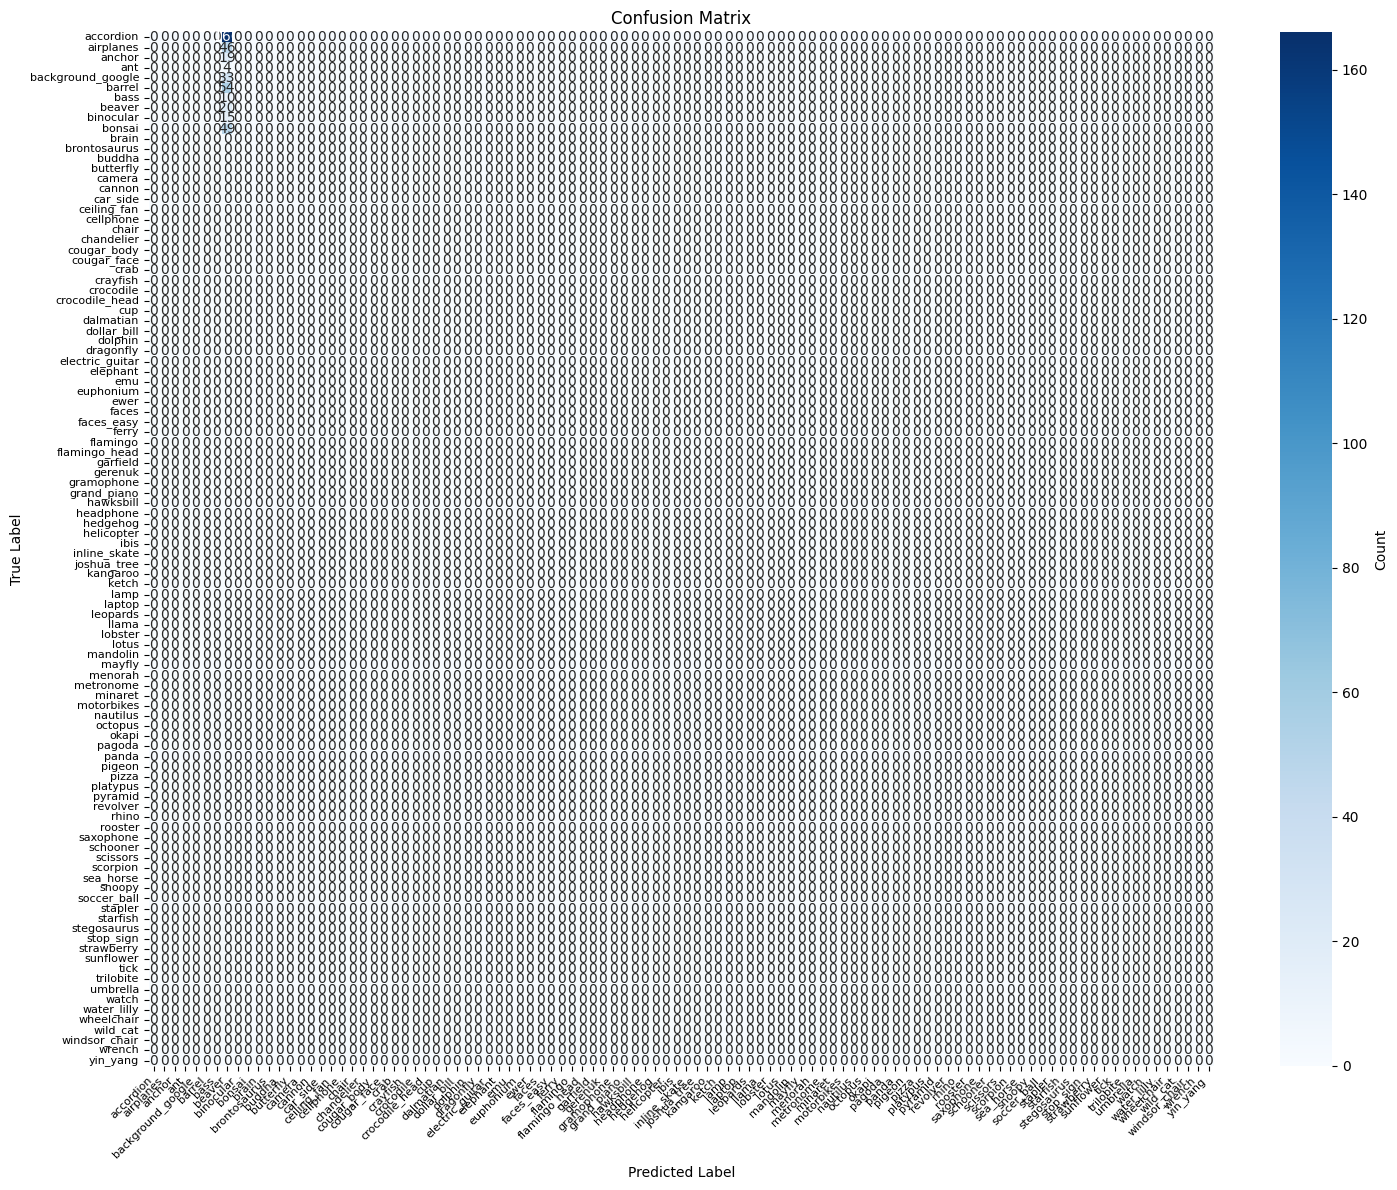

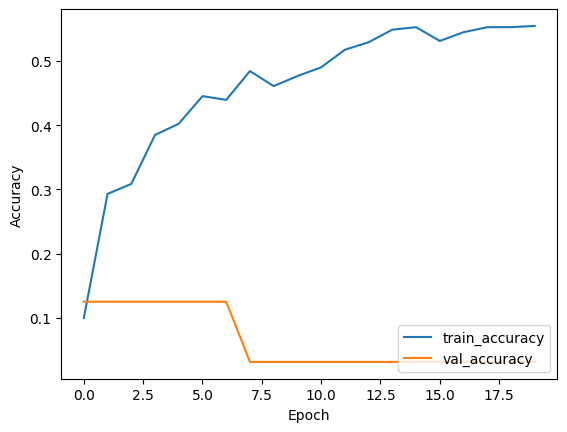

In [24]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Additional layer
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Increased dense layer size
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),  # Higher dropout to regularize

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

# Compile with a lower learning rate
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 13s 665ms/step - accuracy: 0.1036 - loss: 3.5039

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 714ms/step - accuracy: 0.1040 - loss: 3.4592 - val_accuracy: 0.1250 - val_loss: 1.0727
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 804ms/step - accuracy: 0.2182 - loss: 2.1994 - val_accuracy: 0.1719 - val_loss: 0.8510
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 717ms/step - accuracy: 0.3242 - loss: 1.8740 - val_accuracy: 0.2656 - val_loss: 0.6888
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 870ms/step - accuracy: 0.4626 - loss: 1.5930 - val_accuracy: 0.2812 - val_loss: 0.6582
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 838ms/step - accuracy: 0.5290 - loss: 1.3977 - val_accuracy: 0.3281 - val_loss: 0.6111
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 767ms/step - accuracy: 0.5952 - loss: 1.2424 - val_accuracy: 0.2969 - val_loss: 0.5977
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 931ms/step - accuracy: 0.5837 - loss: 1.2325 - val_accuracy: 0.2969 - val_loss: 0.5686
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 782ms/step - accuracy: 0.6401 - loss: 1.1018 - val_accuracy: 0.343

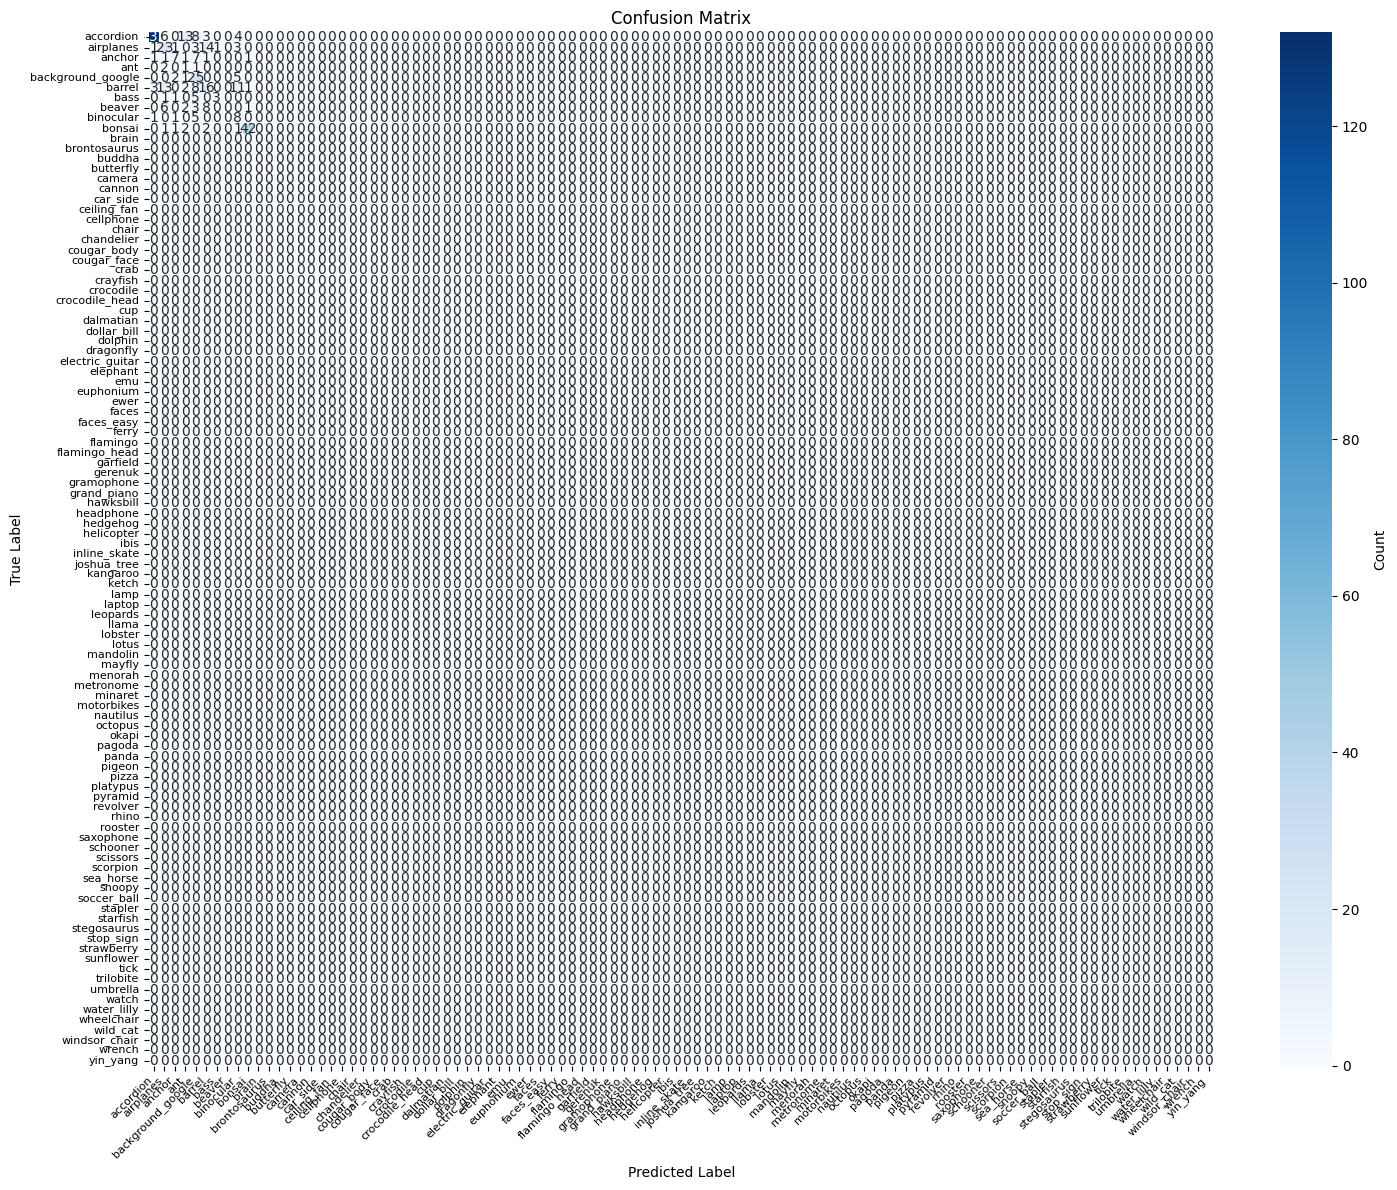

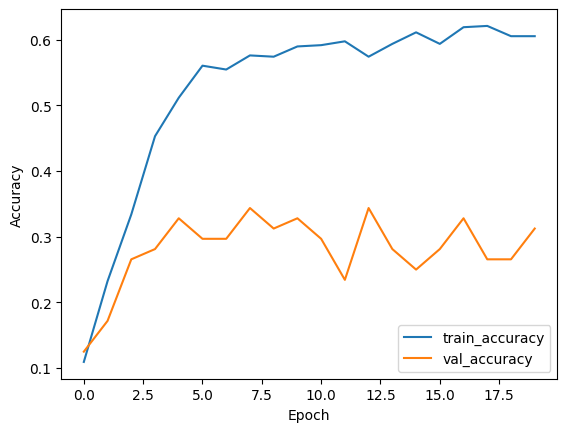

In [25]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Reduced dense layer size
        tf.keras.layers.Dropout(0.1),  # Increased dropout rate
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)


model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 15s 735ms/step - accuracy: 0.1029 - loss: 3.8959

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 766ms/step - accuracy: 0.1037 - loss: 3.8493 - val_accuracy: 0.1562 - val_loss: 1.1954
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 808ms/step - accuracy: 0.2100 - loss: 2.3387 - val_accuracy: 0.1875 - val_loss: 0.8571
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 948ms/step - accuracy: 0.3396 - loss: 1.9405 - val_accuracy: 0.2500 - val_loss: 0.8317
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 795ms/step - accuracy: 0.3743 - loss: 1.7193 - val_accuracy: 0.2812 - val_loss: 0.5763
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 790ms/step - accuracy: 0.5430 - loss: 1.4680 - val_accuracy: 0.2656 - val_loss: 0.5966
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 835ms/step - accuracy: 0.5494 - loss: 1.2889 - val_accuracy: 0.3281 - val_loss: 0.5849
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 896ms/step - accuracy: 0.5566 - loss: 1.3893 - val_accuracy: 0.3438 - val_loss: 0.5317
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 843ms/step - accuracy: 0.5833 - loss: 1.2008 - val_accuracy: 0.281

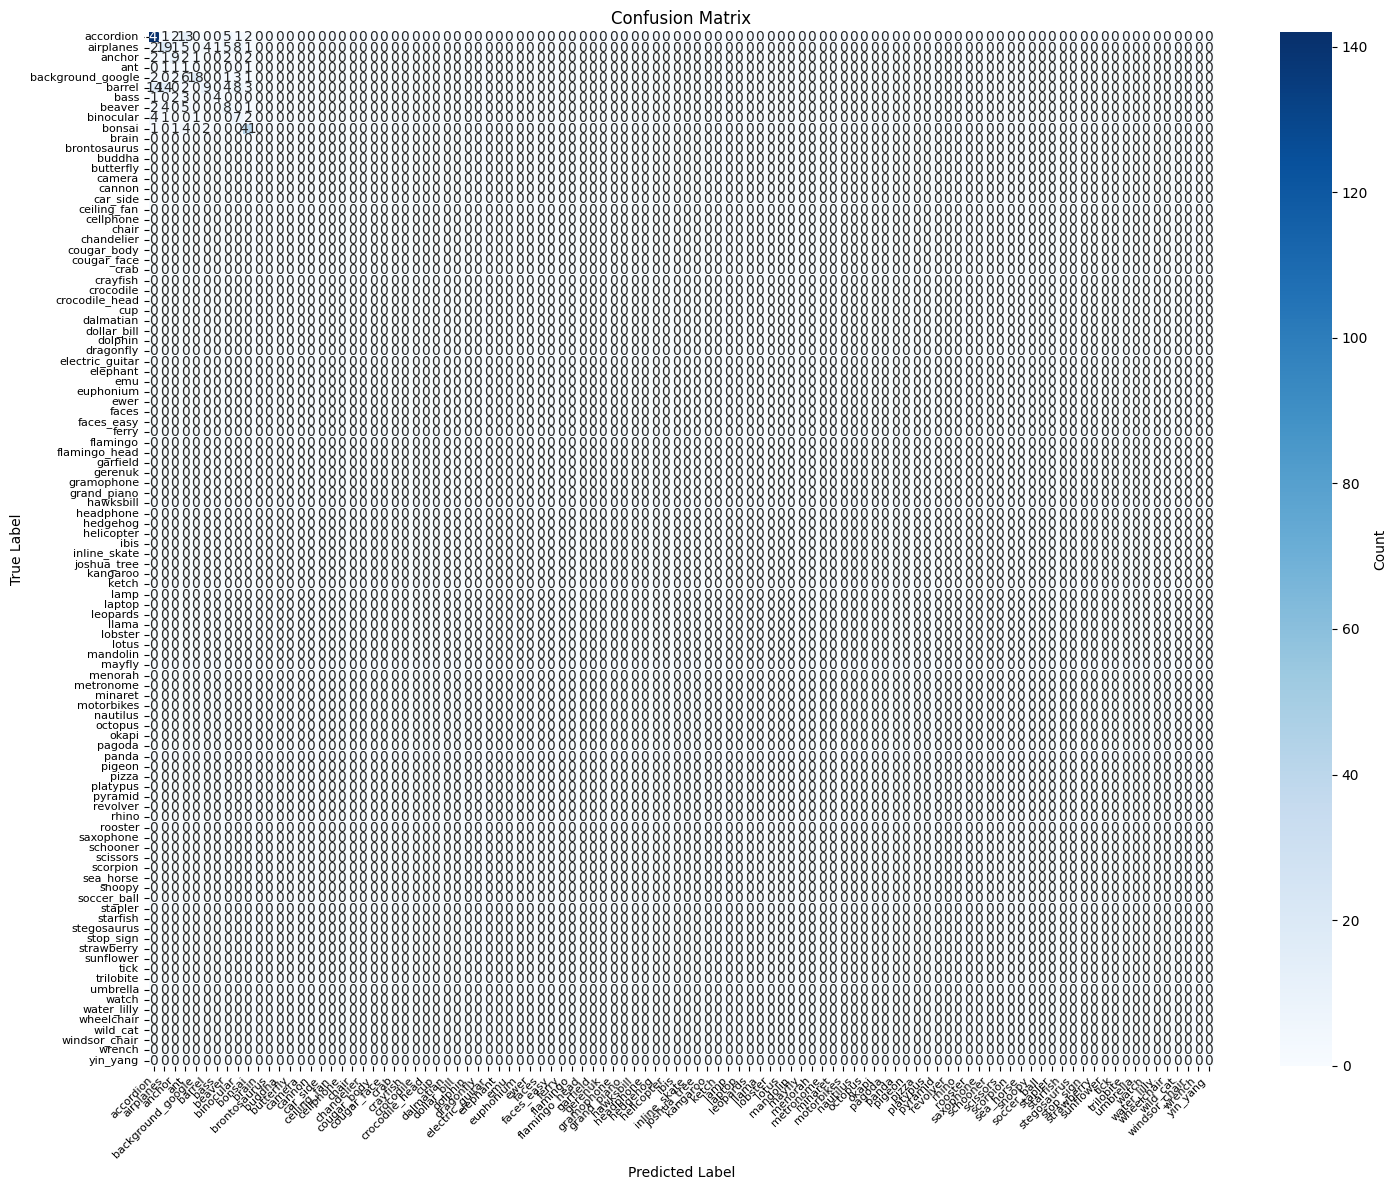

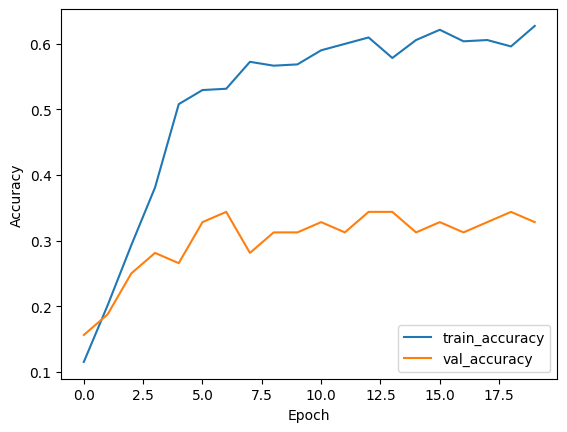

In [26]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Reduced dense layer size
        tf.keras.layers.Dropout(0.1),  # Increased dropout rate
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)


model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

In [27]:
def create_improved_model():
    model = tf.keras.models.Sequential([
        # First Convolutional Block
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),  # Regularization

        # Second Convolutional Block
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        # Third Convolutional Block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Fourth Convolutional Block for Deeper Feature Extraction
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Global Average Pooling instead of Flattening
        tf.keras.layers.GlobalAveragePooling2D(),

        # Fully Connected Layer
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout for Dense layer

        # Output Layer
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.9)

# Instantiate and compile the improved model
model = create_improved_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),  # Reduced learning rate for stability
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model
history = model.fit(train_data, epochs=20, validation_data=val_data)

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     15/Unknown 20s 771ms/step - accuracy: 0.0427 - loss: 4.7679

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 831ms/step - accuracy: 0.0444 - loss: 4.7226 - val_accuracy: 0.0469 - val_loss: 2.2724
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 680ms/step - accuracy: 0.0991 - loss: 3.4416 - val_accuracy: 0.0469 - val_loss: 2.0797
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 862ms/step - accuracy: 0.2168 - loss: 2.9592 - val_accuracy: 0.0469 - val_loss: 1.9674
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 708ms/step - accuracy: 0.1855 - loss: 2.7065 - val_accuracy: 0.0469 - val_loss: 1.8275
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 682ms/step - accuracy: 0.1896 - loss: 2.6713 - val_accuracy: 0.0469 - val_loss: 1.7416
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 680ms/step - accuracy: 0.2378 - loss: 2.4742 - val_accuracy: 0.0312 - val_loss: 1.7403
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 517ms/step - accuracy: 0.2143 - loss: 2.4197 - val_accuracy: 0.0312 - val_loss: 1.7200
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 420ms/step - accuracy: 0.2649 - loss: 2.2293 - val_accuracy: 0.0312

2024-10-30 20:04:38.206451: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 667ms/step - accuracy: 0.3080 - loss: 2.0710 - val_accuracy: 0.0312 - val_loss: 1.9856
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 675ms/step - accuracy: 0.2977 - loss: 2.0218 - val_accuracy: 0.0312 - val_loss: 2.0195
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 711ms/step - accuracy: 0.3075 - loss: 2.0263 - val_accuracy: 0.0312 - val_loss: 2.2007
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 702ms/step - accuracy: 0.2954 - loss: 2.0341 - val_accuracy: 0.0312 - val_loss: 2.2417
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 704ms/step - accuracy: 0.2686 - loss: 2.0800 - val_accuracy: 0.0312 - val_loss: 2.3543
Epoch 16/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 720ms/step - accuracy: 0.3184 - loss: 1.9609 - val_accuracy: 0.0312 - val_loss: 2.3339
Epoch 17/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 580ms/step - accuracy: 0.3287 - loss: 1.9415 - val_accuracy: 0.0312 - val_loss: 2.3977
Epoch 18/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 554ms/step - accuracy: 0.4195 - loss: 1.8166 - val_accuracy:

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step
Accuracy: 4.81%


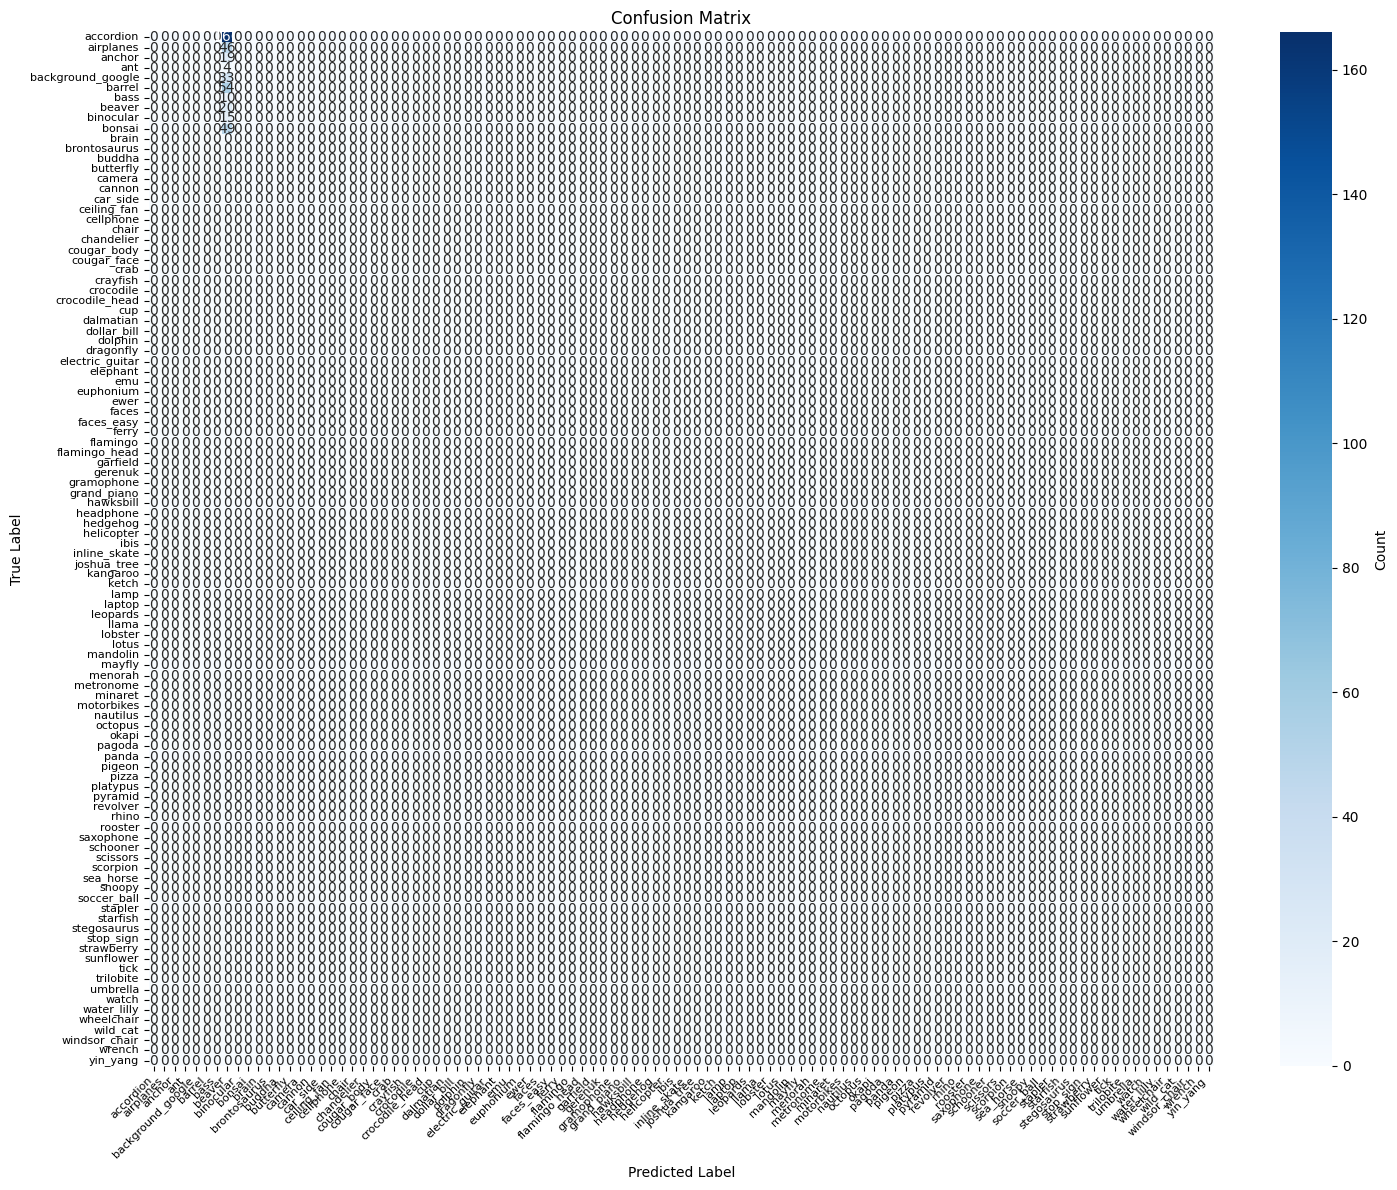

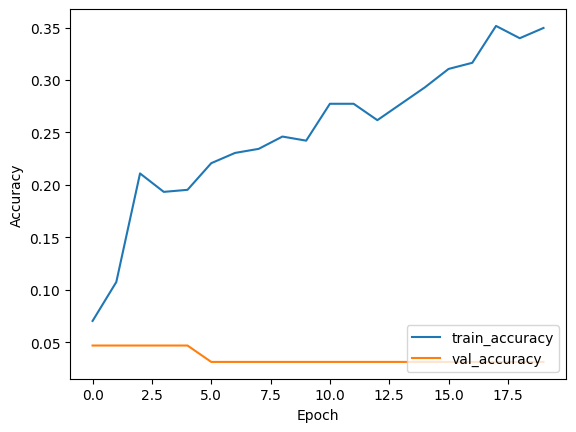

In [28]:
print_results()